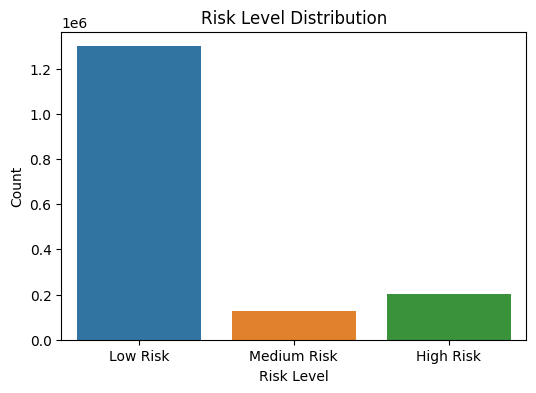

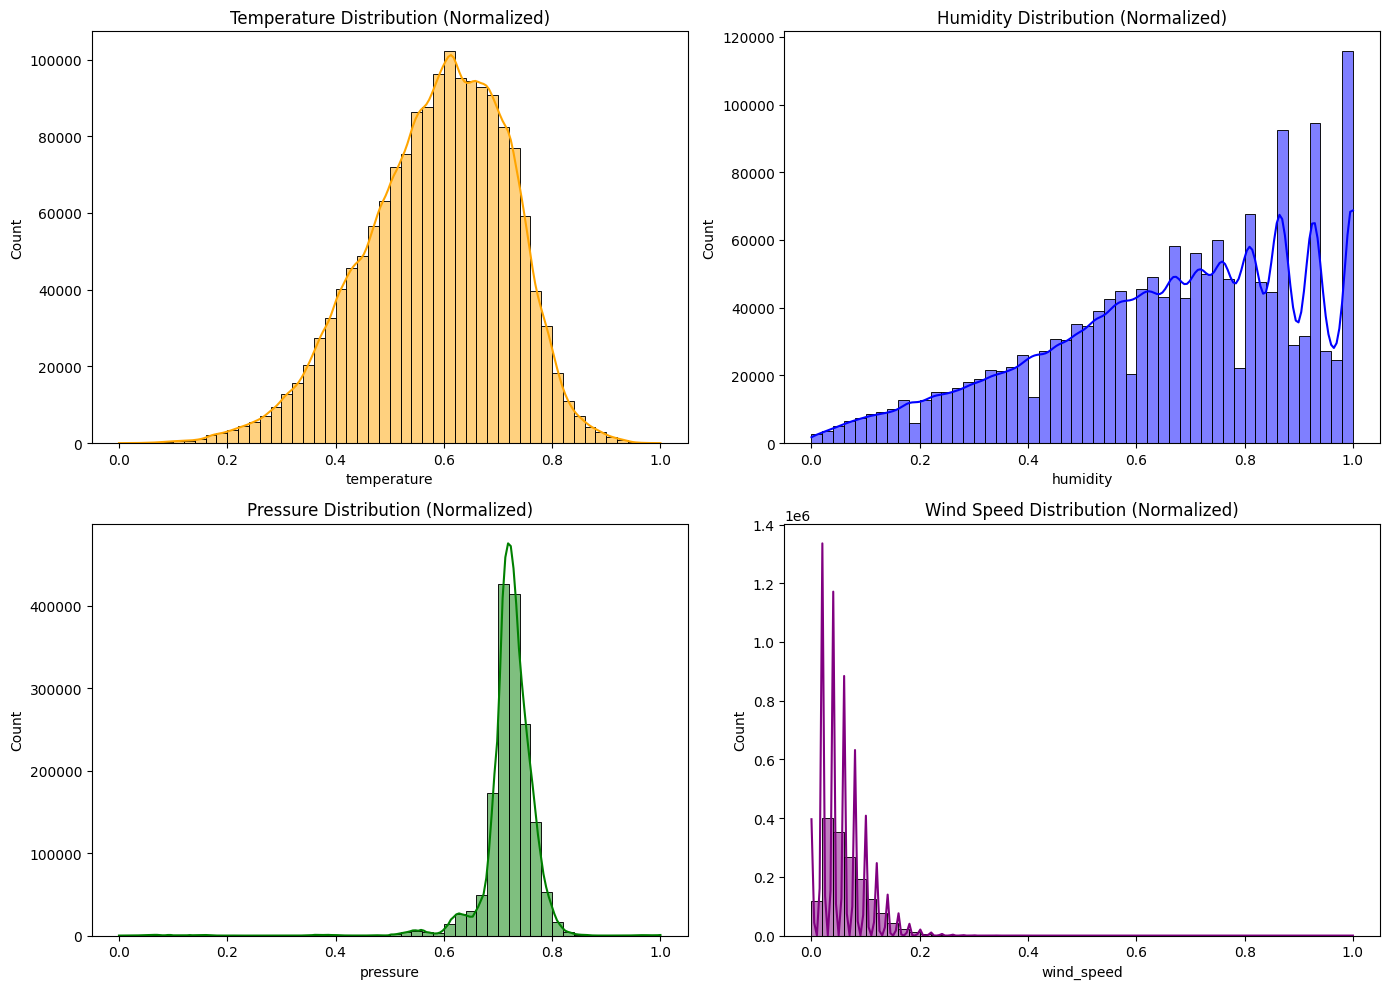

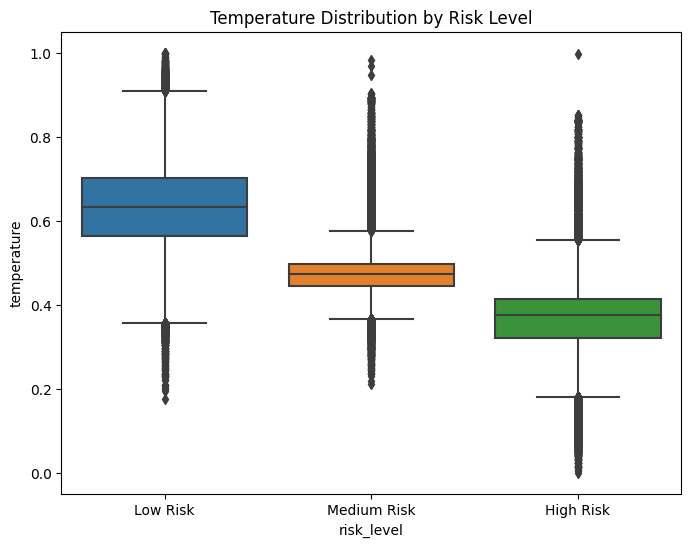

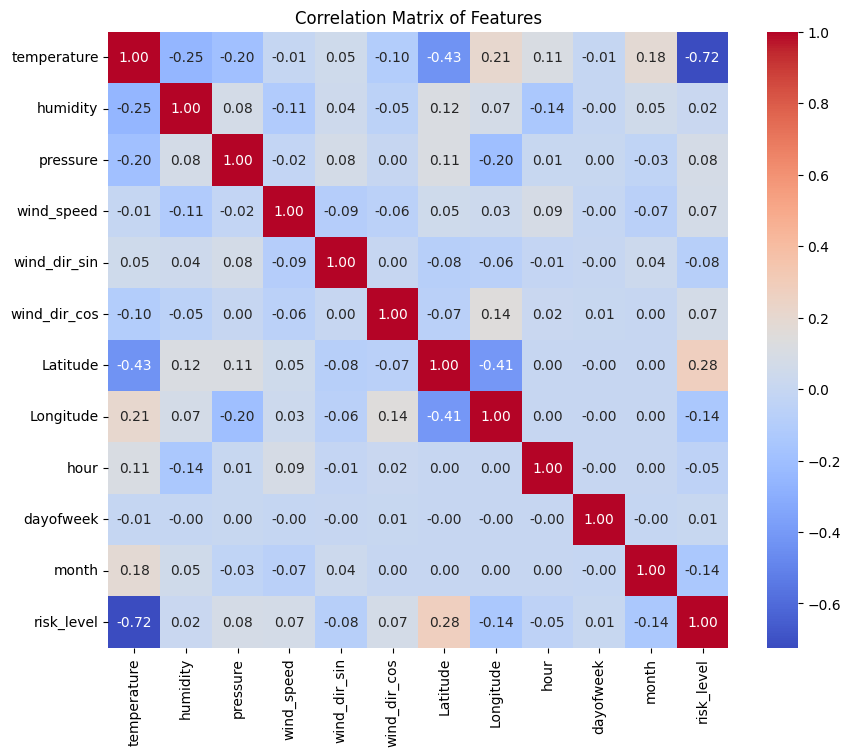

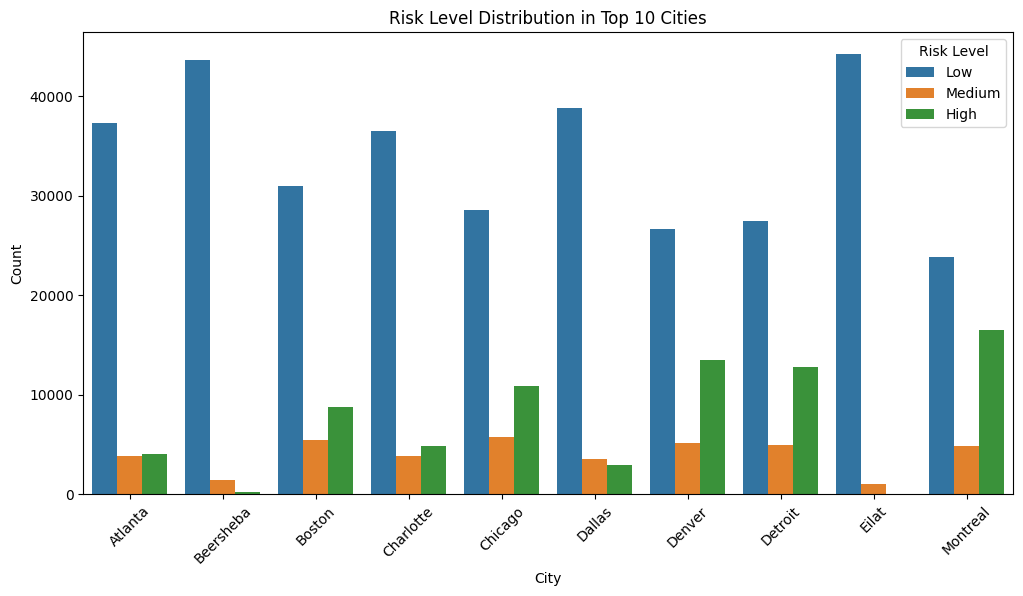

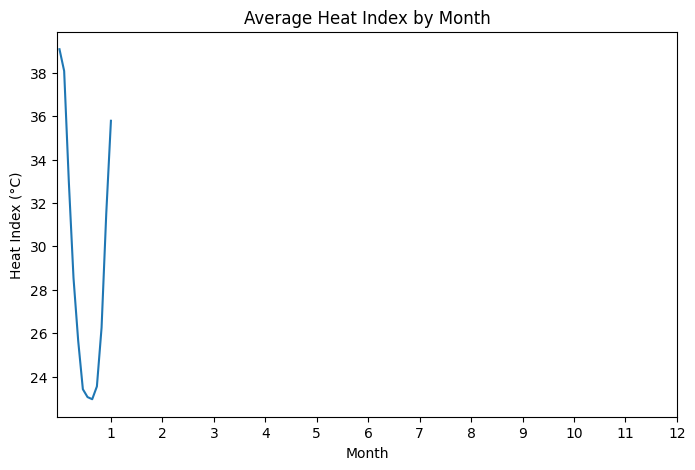

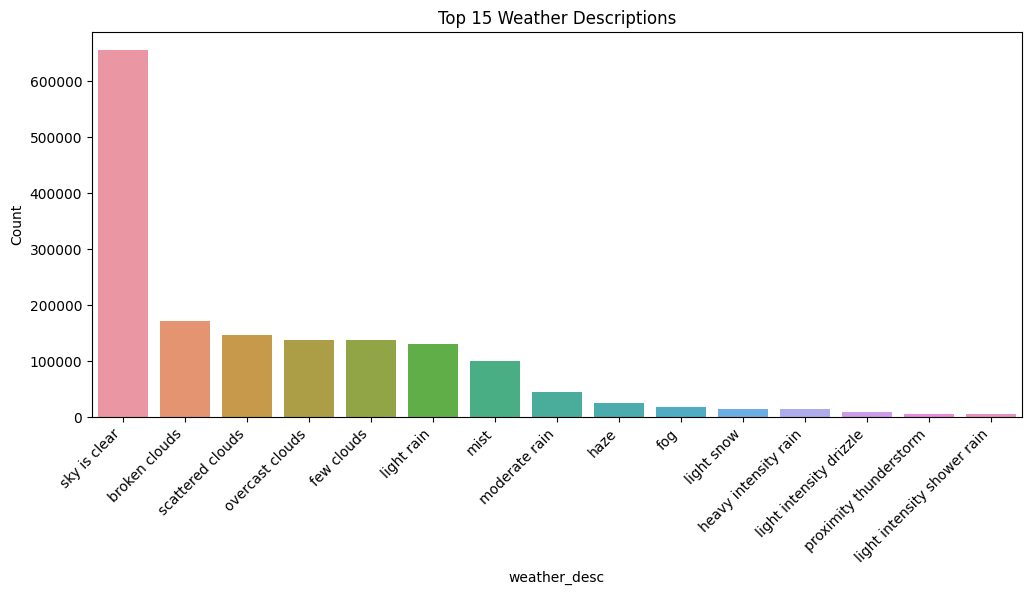

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Class distribution before sequence creation (Risk levels)
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title('Risk Level Distribution')
plt.xticks([0,1,2], ['Low Risk', 'Medium Risk', 'High Risk'])
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

# 2. Distribution of key numerical features (temperature, humidity, pressure, wind speed)
fig, axs = plt.subplots(2, 2, figsize=(14,10))
sns.histplot(df['temperature'], bins=50, ax=axs[0,0], kde=True, color='orange')
axs[0,0].set_title('Temperature Distribution (Normalized)')

sns.histplot(df['humidity'], bins=50, ax=axs[0,1], kde=True, color='blue')
axs[0,1].set_title('Humidity Distribution (Normalized)')

sns.histplot(df['pressure'], bins=50, ax=axs[1,0], kde=True, color='green')
axs[1,0].set_title('Pressure Distribution (Normalized)')

sns.histplot(df['wind_speed'], bins=50, ax=axs[1,1], kde=True, color='purple')
axs[1,1].set_title('Wind Speed Distribution (Normalized)')

plt.tight_layout()
plt.show()

# 3. Boxplots of temperature by risk_level
plt.figure(figsize=(8,6))
sns.boxplot(x='risk_level', y='temperature', data=df)
plt.xticks([0,1,2], ['Low Risk', 'Medium Risk', 'High Risk'])
plt.title('Temperature Distribution by Risk Level')
plt.show()

# 4. Heatmap of correlation between numerical features
plt.figure(figsize=(10,8))
corr_features = ['temperature', 'humidity', 'pressure', 'wind_speed', 
                 'wind_dir_sin', 'wind_dir_cos', 'Latitude', 'Longitude', 
                 'hour', 'dayofweek', 'month', 'risk_level']
corr = df[corr_features].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Risk level counts per city (top 10 cities)
top_cities = df['city'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.countplot(x='city', hue='risk_level', data=df[df['city'].isin(top_cities)])
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Risk Level Distribution in Top 10 Cities')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.show()

# 6. Average heat index by month (aggregate)
def calc_heat_index_from_norm(row):
    temp_c = row['temperature'] * 40 - 10
    humid_perc = row['humidity'] * 100
    return heat_index(temp_c, humid_perc)

df['heat_index'] = df.apply(calc_heat_index_from_norm, axis=1)

monthly_hi = df.groupby('month')['heat_index'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_hi.index, y=monthly_hi.values)
plt.title('Average Heat Index by Month')
plt.xlabel('Month')
plt.ylabel('Heat Index (°C)')
plt.xticks(range(1,13))
plt.show()

# 7. Weather description counts (top 15)
plt.figure(figsize=(12,5))
top_weather = df['weather_desc'].value_counts().nlargest(15)
sns.barplot(x=top_weather.index, y=top_weather.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Weather Descriptions')
plt.ylabel('Count')
plt.show()


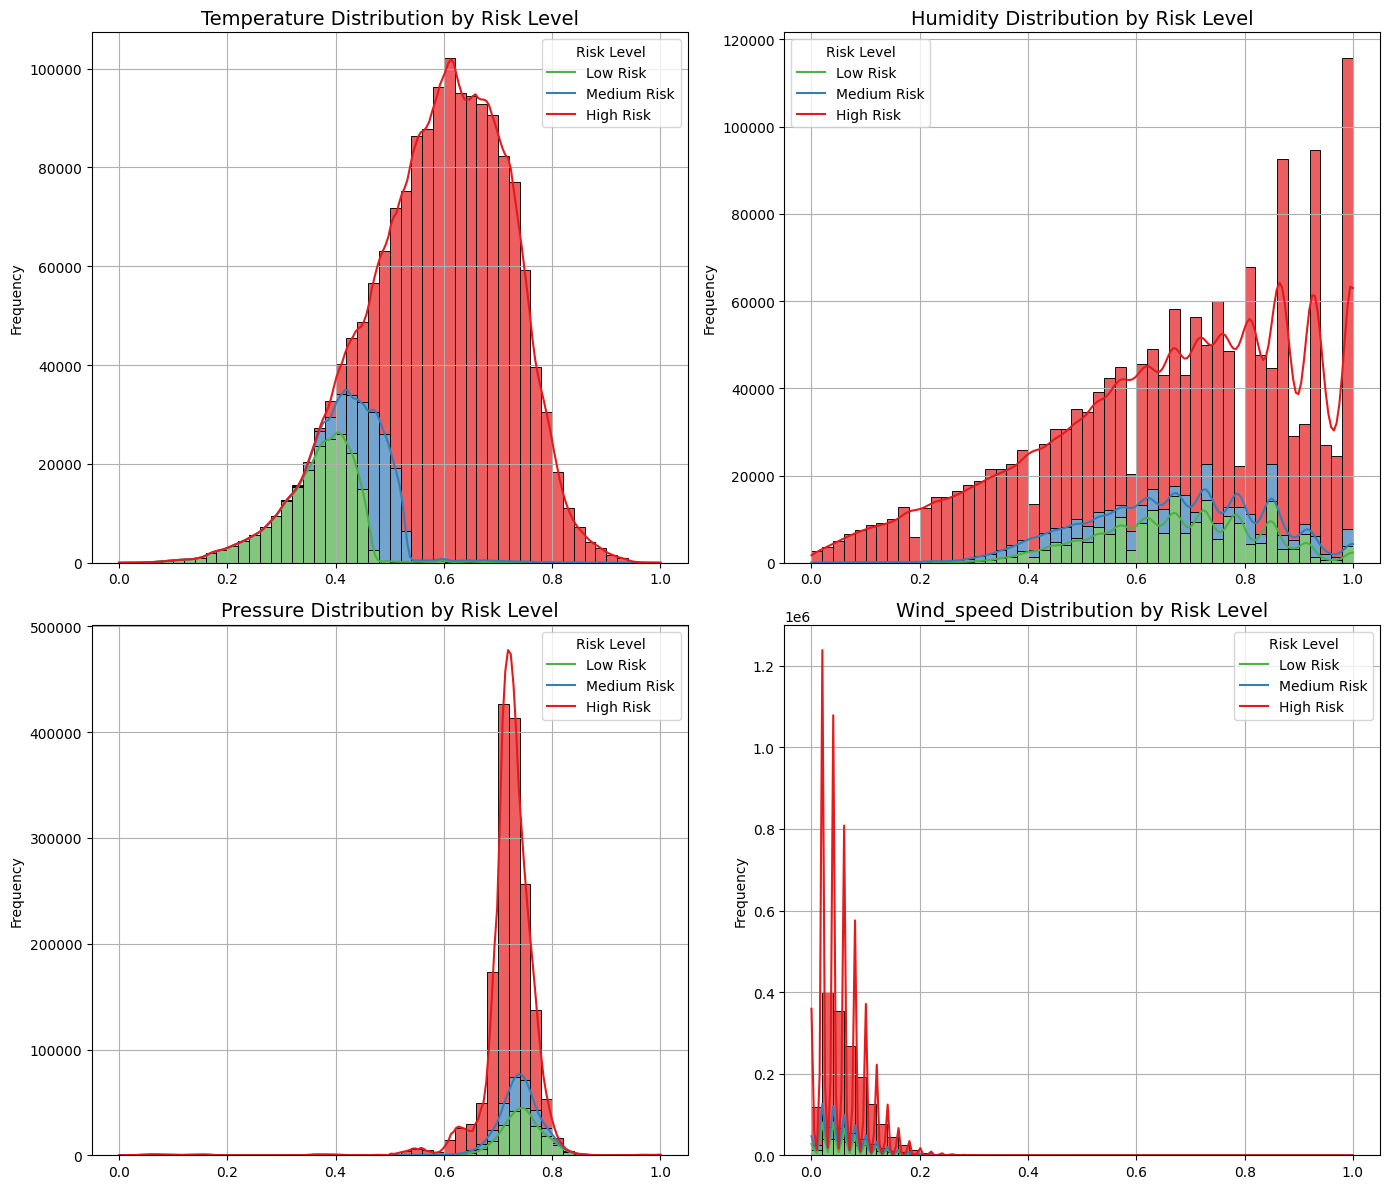

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))  # Wider figure for 2x2 grid

features = ['temperature', 'humidity', 'pressure', 'wind_speed']
risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 cols, ith plot
    sns.histplot(
        data=df,
        x=feature,
        hue='risk_level',
        bins=50,
        kde=True,
        palette='Set1',
        multiple='stack',
        alpha=0.7
    )
    plt.title(f'{feature.capitalize()} Distribution by Risk Level', fontsize=14)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend(title='Risk Level', labels=risk_labels)
    plt.grid(True)

plt.tight_layout()
plt.savefig('risk_level_feature_distributions_2x2.png', dpi=300)
plt.show()


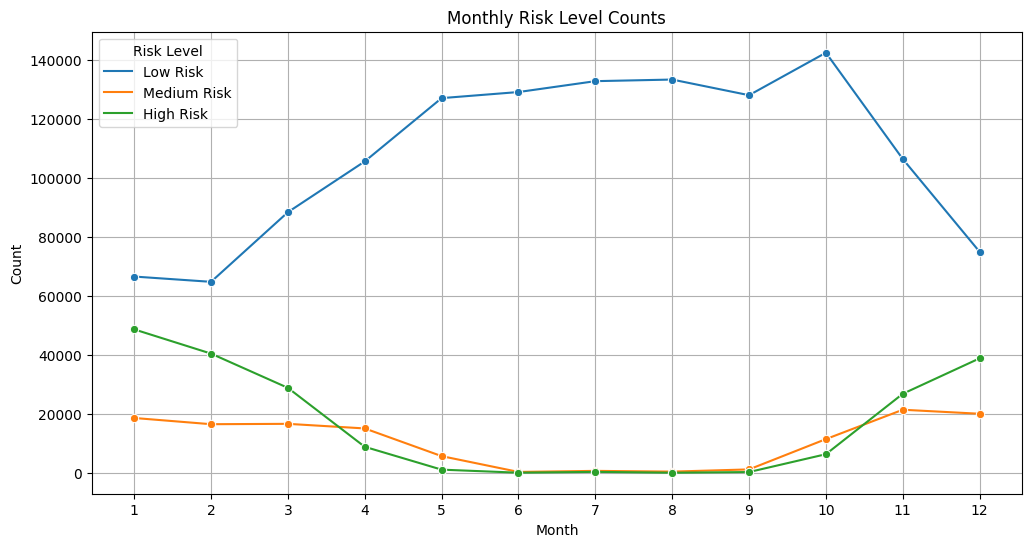

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

df['month'] = df['datetime'].dt.month

monthly_risk = df.groupby(['month', 'risk_level']).size().reset_index(name='count')
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
monthly_risk['risk_label'] = monthly_risk['risk_level'].map(risk_map)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_risk, x='month', y='count', hue='risk_label', marker='o')
plt.title('Monthly Risk Level Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1,13))
plt.legend(title='Risk Level')
plt.grid(True)
plt.show()


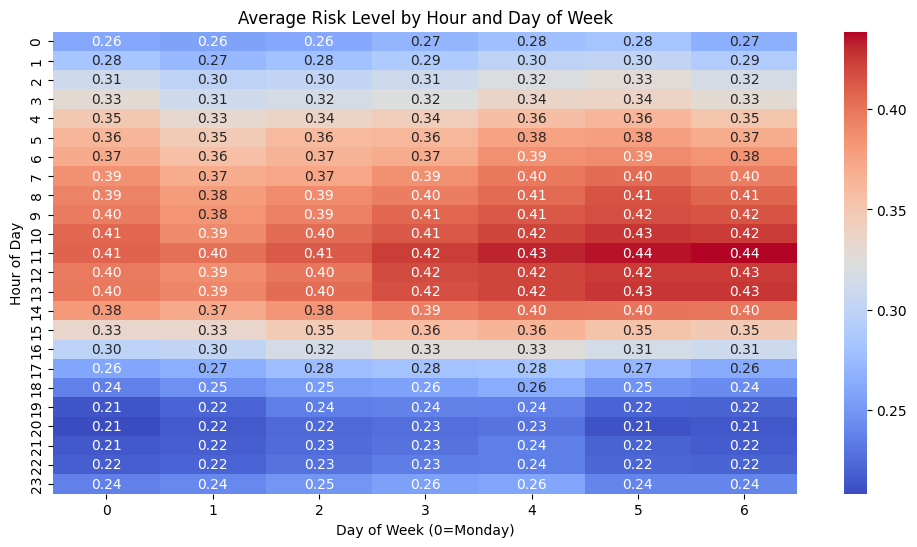

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

pivot = df.pivot_table(index='hour', columns='dayofweek', values='risk_level', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average Risk Level by Hour and Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Hour of Day')
plt.show()


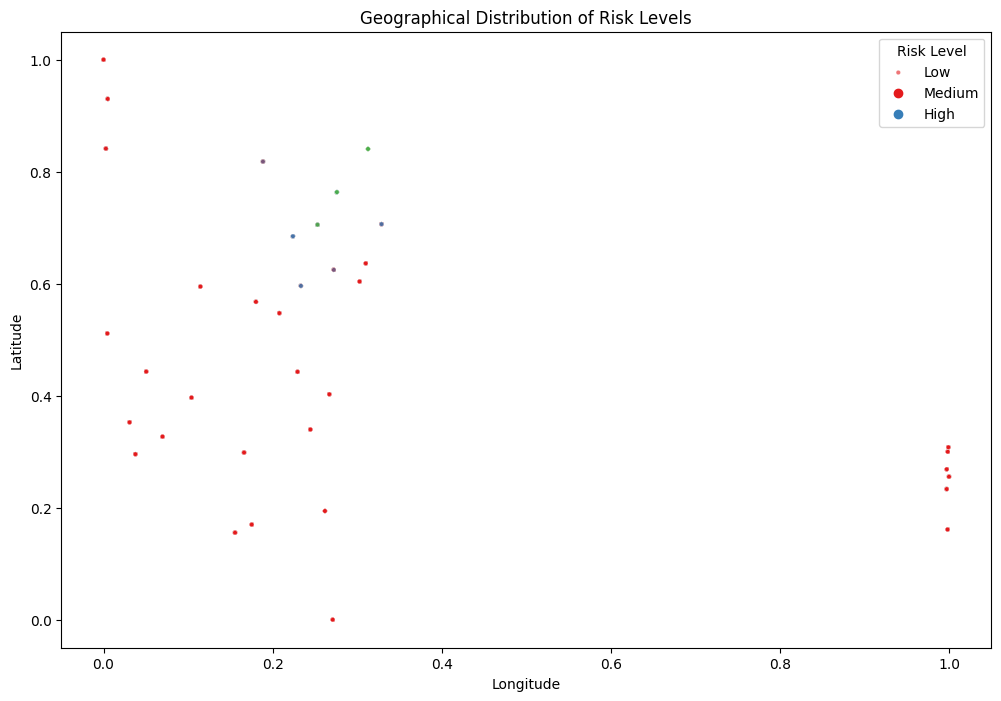

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='risk_level',
    palette='Set1',
    alpha=0.6,
    s=10
)
plt.title('Geographical Distribution of Risk Levels')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.show()


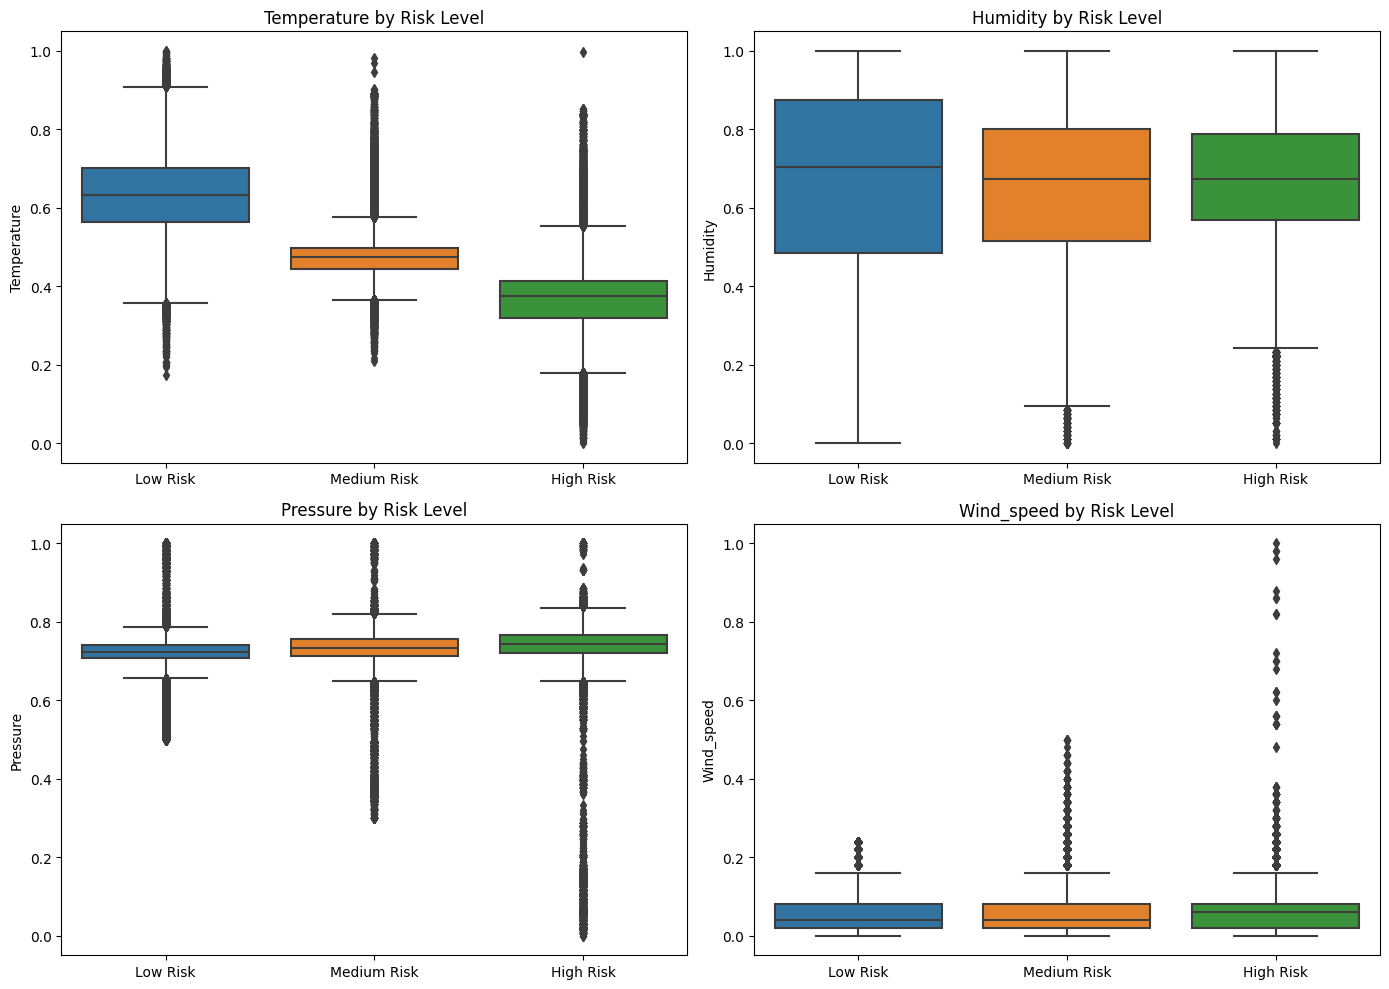

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['temperature', 'humidity', 'pressure', 'wind_speed']
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
df['risk_label'] = df['risk_level'].map(risk_map)

plt.figure(figsize=(14,10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='risk_label', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Risk Level')
    plt.xlabel('')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()


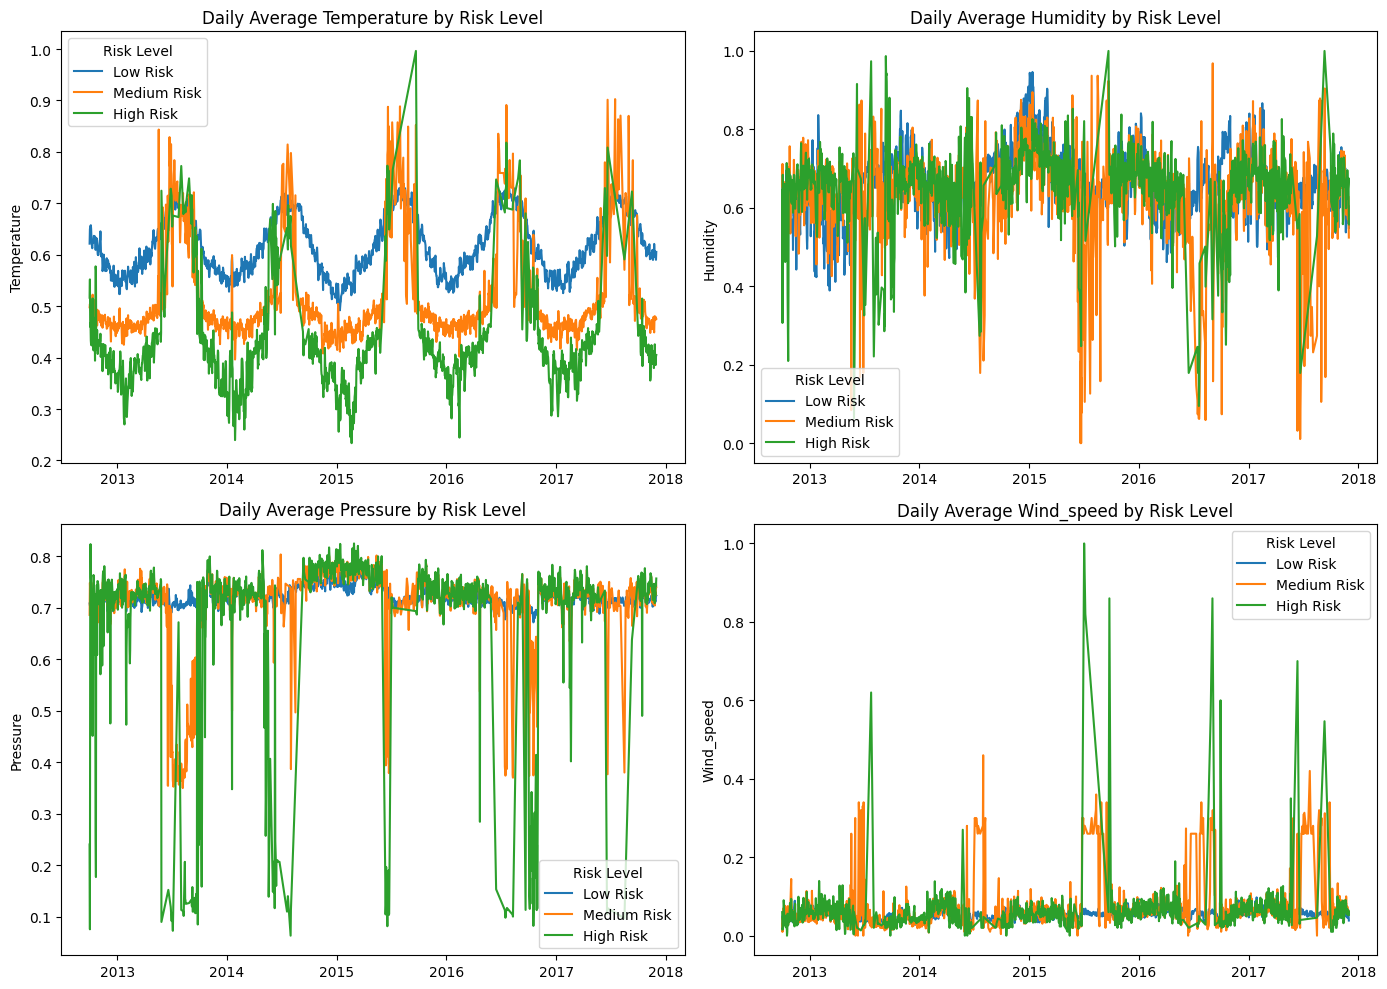

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = df['datetime'].dt.date  # daily aggregation

daily_avg = df.groupby(['date', 'risk_level'])[['temperature', 'humidity', 'pressure', 'wind_speed']].mean().reset_index()
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
daily_avg['risk_label'] = daily_avg['risk_level'].map(risk_map)

plt.figure(figsize=(14,10))

for i, feature in enumerate(['temperature', 'humidity', 'pressure', 'wind_speed'], 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=daily_avg, x='date', y=feature, hue='risk_label')
    plt.title(f'Daily Average {feature.capitalize()} by Risk Level')
    plt.xlabel('')
    plt.ylabel(feature.capitalize())
    plt.legend(title='Risk Level')

plt.tight_layout()
plt.show()


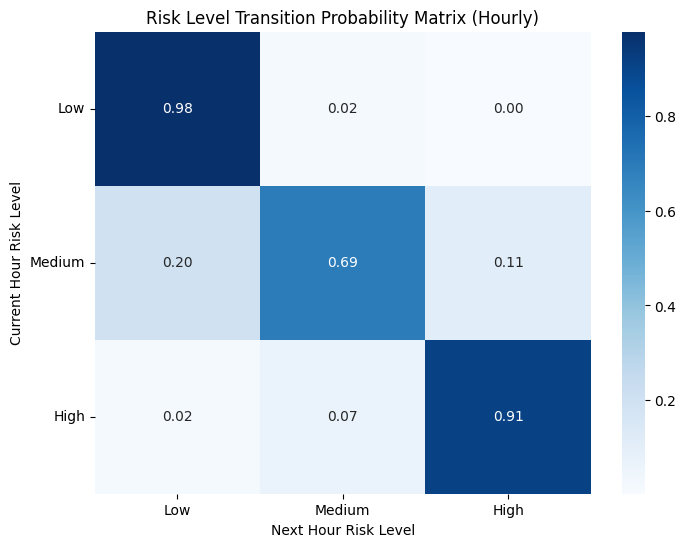

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by city and datetime
df_sorted = df.sort_values(['city', 'datetime'])

# Calculate next hour risk level per city
df_sorted['next_risk_level'] = df_sorted.groupby('city')['risk_level'].shift(-1)

# Drop rows where next risk is NaN (last record in each city)
transitions = df_sorted.dropna(subset=['next_risk_level'])

# Create confusion matrix (transition counts)
conf_matrix = pd.crosstab(transitions['risk_level'], transitions['next_risk_level'])

# Normalize rows to get probabilities
conf_matrix_prob = conf_matrix.div(conf_matrix.sum(axis=1), axis=0)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_prob, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Next Hour Risk Level')
plt.ylabel('Current Hour Risk Level')
plt.title('Risk Level Transition Probability Matrix (Hourly)')
plt.xticks([0.5,1.5,2.5], ['Low', 'Medium', 'High'])
plt.yticks([0.5,1.5,2.5], ['Low', 'Medium', 'High'], rotation=0)
plt.show()


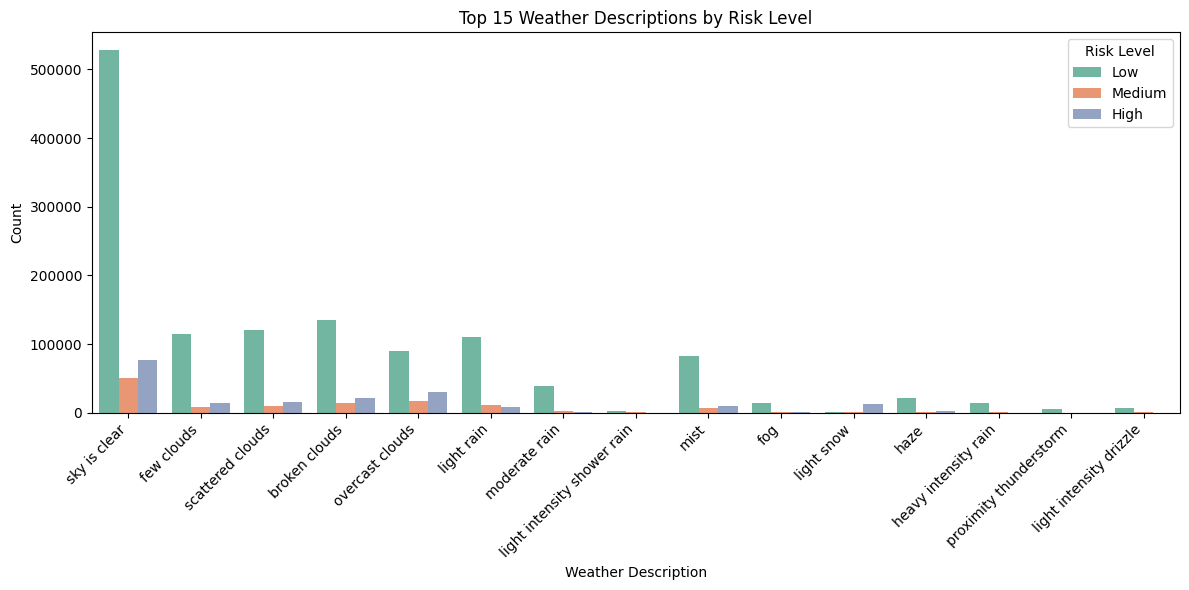

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_weather = df['weather_desc'].value_counts().nlargest(15).index

sns.countplot(
    data=df[df['weather_desc'].isin(top_weather)],
    x='weather_desc',
    hue='risk_level',
    palette='Set2'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Weather Descriptions by Risk Level')
plt.xlabel('Weather Description')
plt.ylabel('Count')
plt.legend(title='Risk Level', labels=['Low', 'Medium', 'High'])
plt.tight_layout()
plt.show()


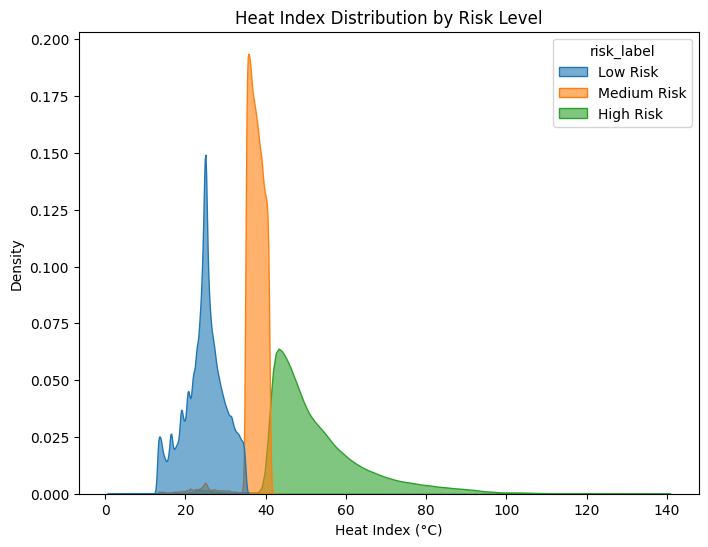

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x='heat_index', hue='risk_label', fill=True, common_norm=False, alpha=0.6)
plt.title('Heat Index Distribution by Risk Level')
plt.xlabel('Heat Index (°C)')
plt.ylabel('Density')
plt.show()


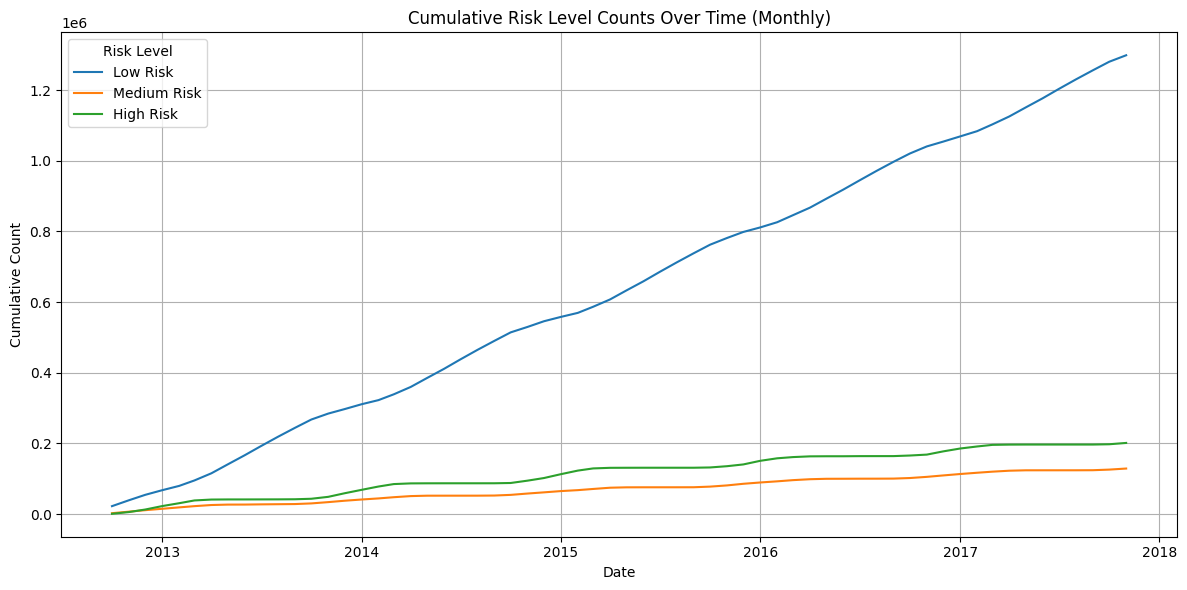

In [44]:
df['month_year'] = df['datetime'].dt.to_period('M')
cum_risk = df.groupby(['month_year', 'risk_level']).size().reset_index(name='count')
cum_risk['month_year'] = cum_risk['month_year'].dt.to_timestamp()
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
cum_risk['risk_label'] = cum_risk['risk_level'].map(risk_map)

plt.figure(figsize=(12,6))
for label in risk_map.values():
    subset = cum_risk[cum_risk['risk_label'] == label].sort_values('month_year')
    subset['cum_count'] = subset['count'].cumsum()
    plt.plot(subset['month_year'], subset['cum_count'], label=label)

plt.title('Cumulative Risk Level Counts Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.legend(title='Risk Level')
plt.grid(True)
plt.tight_layout()
plt.show()


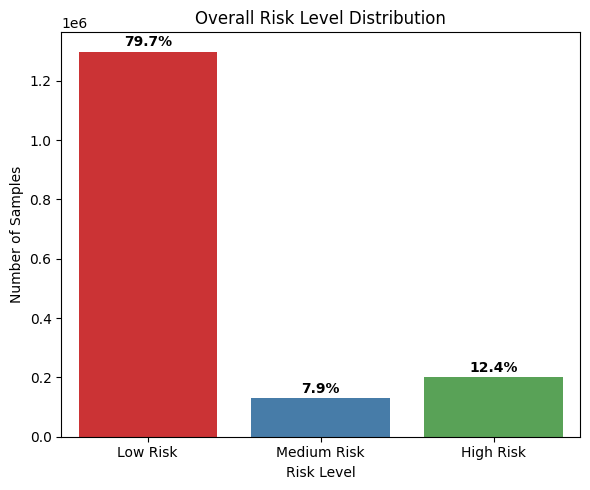

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counts before sequence creation
before_counts = [1298526, 129065, 201516]
risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']
colors = sns.color_palette('Set1', n_colors=3)

plt.figure(figsize=(6,5))
bars = sns.barplot(x=risk_labels, y=before_counts, palette=colors)

# Add percentage labels
total = sum(before_counts)
for i, count in enumerate(before_counts):
    percent = count / total * 100
    plt.text(i, count + total*0.005, f'{percent:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Overall Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


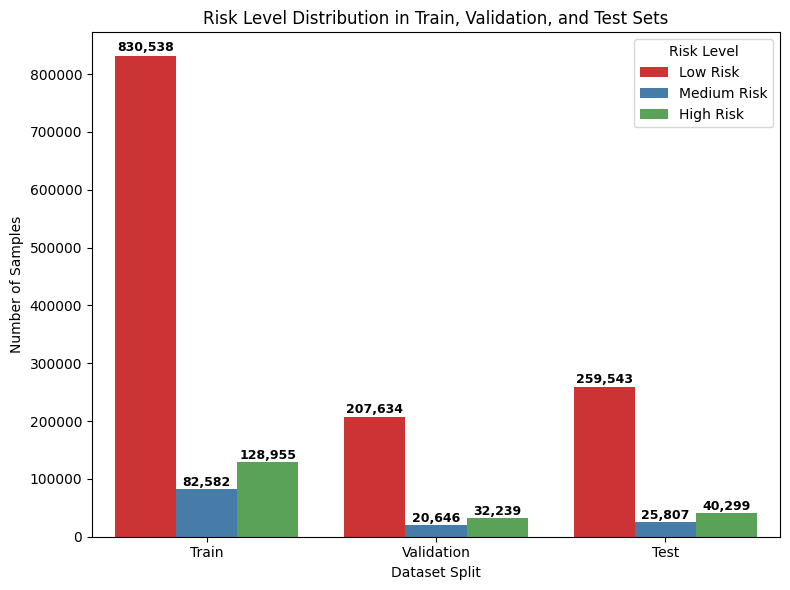

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Counts after splitting
split_df = pd.DataFrame({
    'Train': [830538, 82582, 128955],
    'Validation': [207634, 20646, 32239],
    'Test': [259543, 25807, 40299]
}, index=['Low Risk', 'Medium Risk', 'High Risk'])

# Melt for seaborn
split_melt = split_df.reset_index().melt(id_vars='index', var_name='Set', value_name='Count')
split_melt.rename(columns={'index': 'Risk Level'}, inplace=True)

colors = sns.color_palette('Set1', n_colors=3)

plt.figure(figsize=(8,6))
bars = sns.barplot(data=split_melt, x='Set', y='Count', hue='Risk Level', palette=colors)

# Add count labels on top of bars
for p in bars.patches:
    height = p.get_height()
    if height > 0:
        bars.annotate(
            f'{int(height):,}',
            (p.get_x() + p.get_width()/2, height + height*0.005),
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

plt.title('Risk Level Distribution in Train, Validation, and Test Sets')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset Split')
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()


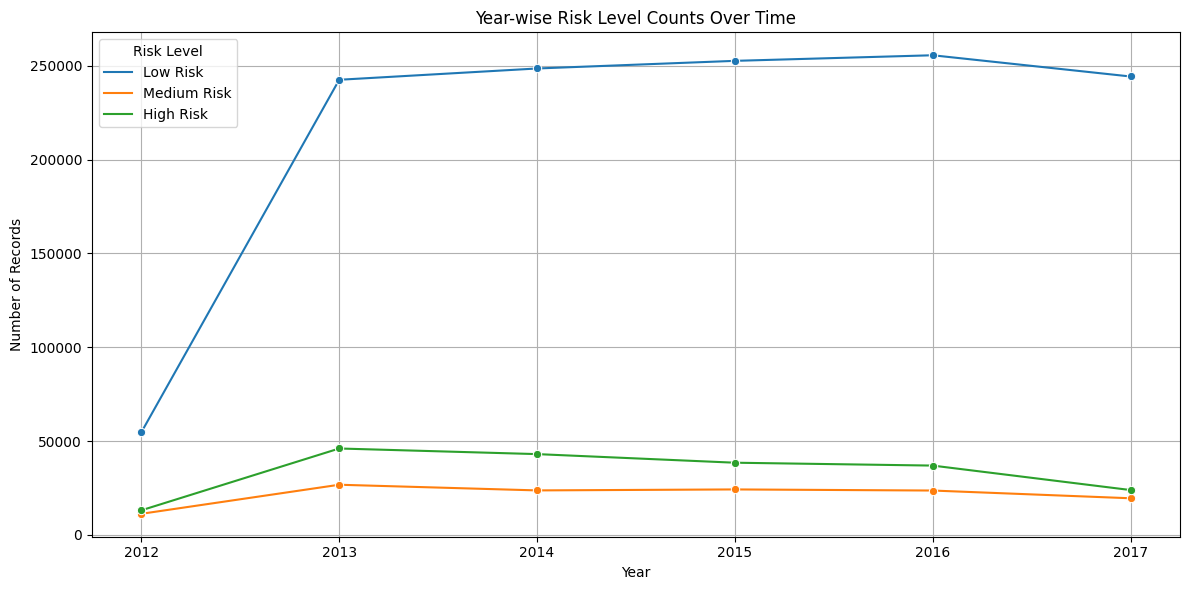

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from datetime
df['year'] = df['datetime'].dt.year

# Aggregate counts of each risk level per year
yearly_risk = df.groupby(['year', 'risk_level']).size().reset_index(name='count')

# Map numeric risk levels to labels
risk_map = {0: 'Low Risk', 1: 'Medium Risk', 2: 'High Risk'}
yearly_risk['risk_label'] = yearly_risk['risk_level'].map(risk_map)

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_risk, x='year', y='count', hue='risk_label', marker='o')
plt.title('Year-wise Risk Level Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.legend(title='Risk Level')
plt.grid(True)
plt.tight_layout()
plt.savefig('yearwise_risk_level_trends.png', dpi=300)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report



# 13. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Optional: further split training set into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Train set class distribution:")
print(pd.Series(y_train_final).value_counts().sort_index())

print("Validation set class distribution:")
print(pd.Series(y_val).value_counts().sort_index())

print("Test set class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

# One-hot encode targets
y_train_cat = to_categorical(y_train_final, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# 14. Build Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(sequence_length, len(features))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 15. Callbacks for better training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# 16. Train model
history = model.fit(
    X_train_final, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    shuffle=False
)

# 17. Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# 18. Predict & Classification Report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'Medium Risk', 'High Risk']))


Train set class distribution:
0    830538
1     82582
2    128955
Name: count, dtype: int64
Validation set class distribution:
0    207634
1     20646
2     32239
Name: count, dtype: int64
Test set class distribution:
0    259543
1     25807
2     40299
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_28 (Bidirectional)     │ (None, 24, 128)             │          39,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_29 (Bidirectional)     │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,995 (332.01 KB)

 Trainable params: 84,995 (332.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 117s 14ms/step - accuracy: 0.8886 - loss: 0.2902 - val_accuracy: 0.9257 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 2/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 110s 13ms/step - accuracy: 0.9295 - loss: 0.1779 - val_accuracy: 0.9265 - val_loss: 0.1748 - learning_rate: 0.0010
Epoch 3/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 110s 13ms/step - accuracy: 0.9349 - loss: 0.1662 - val_accuracy: 0.9405 - val_loss: 0.1544 - learning_rate: 0.0010
Epoch 4/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 110s 14ms/step - accuracy: 0.9357 - loss: 0.1636 - val_accuracy: 0.9355 - val_loss: 0.1627 - learning_rate: 0.0010
Epoch 5/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 110s 13ms/step - accuracy: 0.9408 - loss: 0.1521 - val_accuracy: 0.9370 - val_loss: 0.1581 - learning_rate: 0.0010
Epoch 6/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 109s 13ms/step - accuracy: 0.9420 - loss: 0.1490 - val_accuracy: 0.9446 - val_loss: 0.1424 - learning_rate: 0.0010
Epoch 7/50
8142/8142 ━━━━━━━━━━━━━━━━━━━━ 109s 13ms/step -

In [51]:
import matplotlib.pyplot as plt

# === 1️⃣ Put your exact values ===

# Loss values you gave
train_loss = [
    0.2902, 0.1779, 0.1662, 0.1636, 0.1521, 0.1490, 0.1486, 0.1438, 0.1421, 0.1406,
    0.1388, 0.1376, 0.1360, 0.1354, 0.1346, 0.1335, 0.1333, 0.1327, 0.1274, 0.1265,
    0.1258, 0.1256, 0.1249, 0.1219, 0.1216, 0.1211, 0.1208, 0.1205, 0.1203, 0.1202,
    0.1203, 0.1183, 0.1179, 0.1177, 0.1176, 0.1168, 0.1165, 0.1165, 0.1165, 0.1158,
    0.1157, 0.1158, 0.1157, 0.1157, 0.1154, 0.1152, 0.1155, 0.1153, 0.1153, 0.1151
]

val_loss = [
    0.1912, 0.1748, 0.1544, 0.1627, 0.1581, 0.1424, 0.1461, 0.1387, 0.1319, 0.1366,
    0.1297, 0.1300, 0.1294, 0.1286, 0.1279, 0.1347, 0.1279, 0.1297, 0.1275, 0.1254,
    0.1263, 0.1274, 0.1257, 0.1251, 0.1265, 0.1249, 0.1253, 0.1246, 0.1263, 0.1254,
    0.1260, 0.1241, 0.1241, 0.1241, 0.1248, 0.1238, 0.1239, 0.1239, 0.1239, 0.1237,
    0.1237, 0.1237, 0.1237, 0.1238, 0.1237, 0.1236, 0.1236, 0.1237, 0.1236, 0.1236
]

# Accuracy values you gave
train_acc = [
    0.8886, 0.9295, 0.9349, 0.9357, 0.9408, 0.9420, 0.9417, 0.9438, 0.9445, 0.9446,
    0.9453, 0.9457, 0.9463, 0.9464, 0.9467, 0.9473, 0.9468, 0.9476, 0.9496, 0.9498,
    0.9501, 0.9502, 0.9503, 0.9518, 0.9518, 0.9520, 0.9523, 0.9521, 0.9523, 0.9523,
    0.9520, 0.9531, 0.9531, 0.9532, 0.9533, 0.9536, 0.9539, 0.9538, 0.9537, 0.9540,
    0.9541, 0.9539, 0.9541, 0.9541, 0.9541, 0.9542, 0.9542, 0.9542, 0.9543, 0.9543
]

val_acc = [
    0.9257, 0.9265, 0.9405, 0.9355, 0.9370, 0.9446, 0.9424, 0.9459, 0.9489, 0.9468,
    0.9487, 0.9491, 0.9496, 0.9491, 0.9499, 0.9468, 0.9500, 0.9486, 0.9495, 0.9511,
    0.9502, 0.9503, 0.9510, 0.9513, 0.9506, 0.9514, 0.9512, 0.9516, 0.9510, 0.9512,
    0.9509, 0.9518, 0.9517, 0.9516, 0.9515, 0.9519, 0.9518, 0.9519, 0.9518, 0.9520,
    0.9520, 0.9520, 0.9520, 0.9520, 0.9520, 0.9521, 0.9521, 0.9521, 0.9521, 0.9520
]

epochs = range(1, 51)


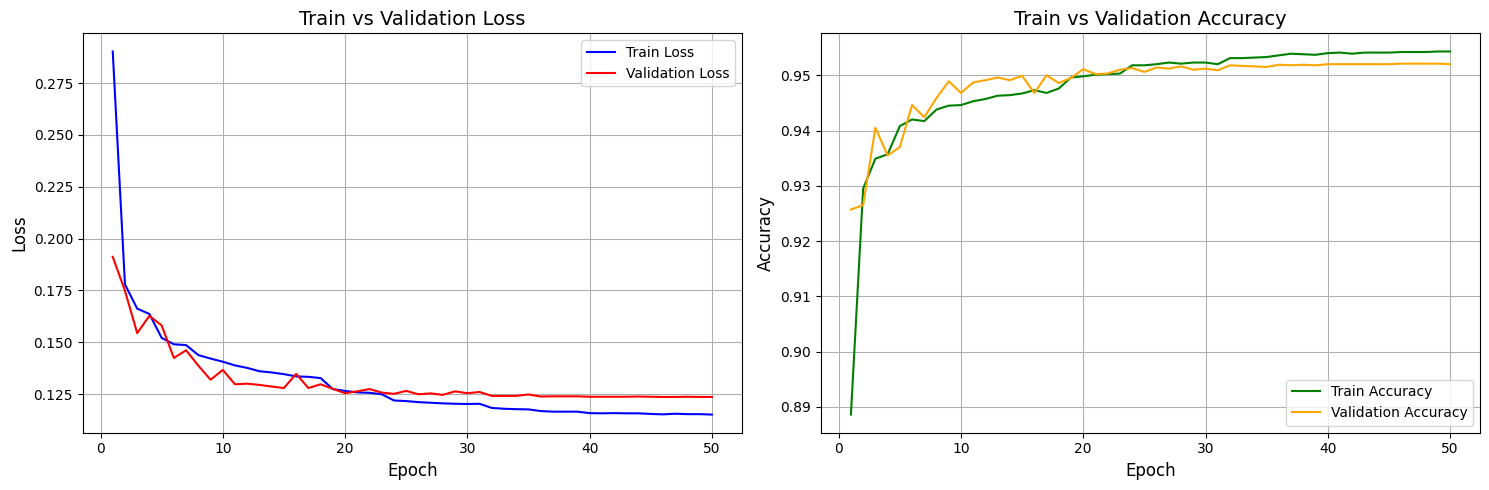

In [53]:
import matplotlib.pyplot as plt

# === Your exact values ===

train_loss = [
    0.2902, 0.1779, 0.1662, 0.1636, 0.1521, 0.1490, 0.1486, 0.1438, 0.1421, 0.1406,
    0.1388, 0.1376, 0.1360, 0.1354, 0.1346, 0.1335, 0.1333, 0.1327, 0.1274, 0.1265,
    0.1258, 0.1256, 0.1249, 0.1219, 0.1216, 0.1211, 0.1208, 0.1205, 0.1203, 0.1202,
    0.1203, 0.1183, 0.1179, 0.1177, 0.1176, 0.1168, 0.1165, 0.1165, 0.1165, 0.1158,
    0.1157, 0.1158, 0.1157, 0.1157, 0.1154, 0.1152, 0.1155, 0.1153, 0.1153, 0.1151
]

val_loss = [
    0.1912, 0.1748, 0.1544, 0.1627, 0.1581, 0.1424, 0.1461, 0.1387, 0.1319, 0.1366,
    0.1297, 0.1300, 0.1294, 0.1286, 0.1279, 0.1347, 0.1279, 0.1297, 0.1275, 0.1254,
    0.1263, 0.1274, 0.1257, 0.1251, 0.1265, 0.1249, 0.1253, 0.1246, 0.1263, 0.1254,
    0.1260, 0.1241, 0.1241, 0.1241, 0.1248, 0.1238, 0.1239, 0.1239, 0.1239, 0.1237,
    0.1237, 0.1237, 0.1237, 0.1238, 0.1237, 0.1236, 0.1236, 0.1237, 0.1236, 0.1236
]

train_acc = [
    0.8886, 0.9295, 0.9349, 0.9357, 0.9408, 0.9420, 0.9417, 0.9438, 0.9445, 0.9446,
    0.9453, 0.9457, 0.9463, 0.9464, 0.9467, 0.9473, 0.9468, 0.9476, 0.9496, 0.9498,
    0.9501, 0.9502, 0.9503, 0.9518, 0.9518, 0.9520, 0.9523, 0.9521, 0.9523, 0.9523,
    0.9520, 0.9531, 0.9531, 0.9532, 0.9533, 0.9536, 0.9539, 0.9538, 0.9537, 0.9540,
    0.9541, 0.9539, 0.9541, 0.9541, 0.9541, 0.9542, 0.9542, 0.9542, 0.9543, 0.9543
]

val_acc = [
    0.9257, 0.9265, 0.9405, 0.9355, 0.9370, 0.9446, 0.9424, 0.9459, 0.9489, 0.9468,
    0.9487, 0.9491, 0.9496, 0.9491, 0.9499, 0.9468, 0.9500, 0.9486, 0.9495, 0.9511,
    0.9502, 0.9503, 0.9510, 0.9513, 0.9506, 0.9514, 0.9512, 0.9516, 0.9510, 0.9512,
    0.9509, 0.9518, 0.9517, 0.9516, 0.9515, 0.9519, 0.9518, 0.9519, 0.9518, 0.9520,
    0.9520, 0.9520, 0.9520, 0.9520, 0.9520, 0.9521, 0.9521, 0.9521, 0.9521, 0.9520
]

epochs = range(1, 51)

# === 2️⃣ Create side-by-side plots ===

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# --- Loss plot ---
axs[0].plot(epochs, train_loss, label='Train Loss', color='blue')
axs[0].plot(epochs, val_loss, label='Validation Loss', color='red')
axs[0].set_title('Train vs Validation Loss', fontsize=14)
axs[0].set_xlabel('Epoch', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].legend()
axs[0].grid(True)

# --- Accuracy plot ---
axs[1].plot(epochs, train_acc, label='Train Accuracy', color='green')
axs[1].plot(epochs, val_acc, label='Validation Accuracy', color='orange')
axs[1].set_title('Train vs Validation Accuracy', fontsize=14)
axs[1].set_xlabel('Epoch', fontsize=12)
axs[1].set_ylabel('Accuracy', fontsize=12)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


✅ Accuracy: 0.9523

✅ Classification Report:

              precision    recall  f1-score   support

    Low Risk       0.98      0.98      0.98    259543
 Medium Risk       0.73      0.70      0.72     25807
   High Risk       0.92      0.93      0.92     40299

    accuracy                           0.95    325649
   macro avg       0.88      0.87      0.87    325649
weighted avg       0.95      0.95      0.95    325649



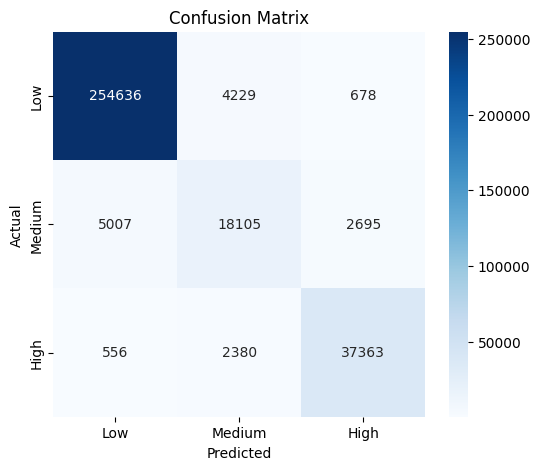

10177/10177 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step


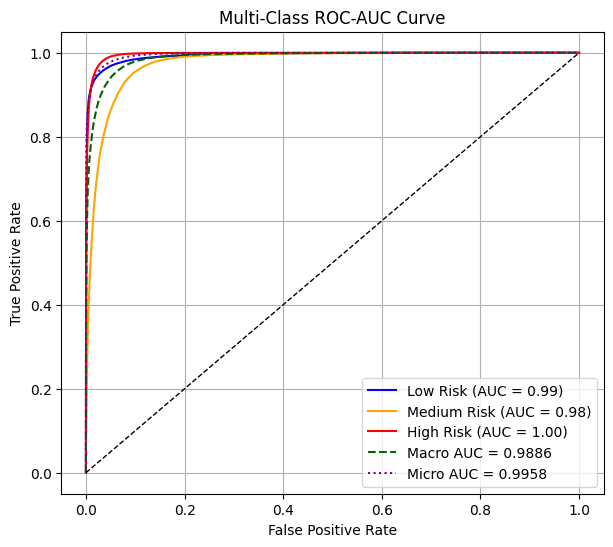

In [45]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import seaborn as sns

# ========================
# 1. Accuracy & Report
# ========================
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.4f}")
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Low Risk', 'Medium Risk', 'High Risk']))

# ========================
# 2. Confusion Matrix
# ========================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ========================
# 3. ROC-AUC Curve
# ========================
# Binarize y_test for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# ========================
# 4. Plot ROC-AUC Curve
# ========================
plt.figure(figsize=(7, 6))
colors = ['blue', 'orange', 'red']
labels = ['Low Risk', 'Medium Risk', 'High Risk']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='darkgreen', linestyle='--',
         label=f'Macro AUC = {roc_auc["macro"]:.4f}')
plt.plot(fpr["micro"], tpr["micro"], color='purple', linestyle=':',
         label=f'Micro AUC = {roc_auc["micro"]:.4f}')
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


10177/10177 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


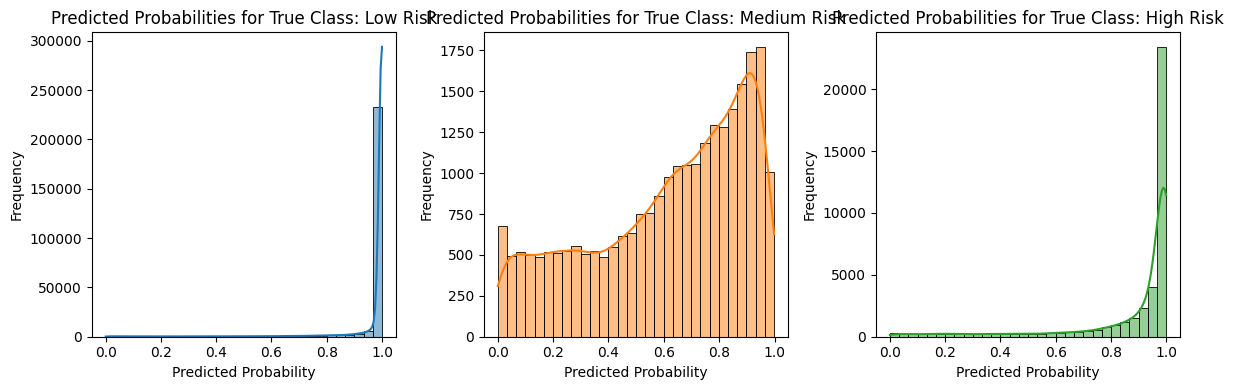

In [54]:
import numpy as np

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

plt.figure(figsize=(12, 4))

for i, cls in enumerate(['Low Risk', 'Medium Risk', 'High Risk']):
    plt.subplot(1, 3, i+1)
    sns.histplot(y_pred_prob[y_test == i, i], bins=30, kde=True, color='C'+str(i))
    plt.title(f'Predicted Probabilities for True Class: {cls}')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


10177/10177 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step


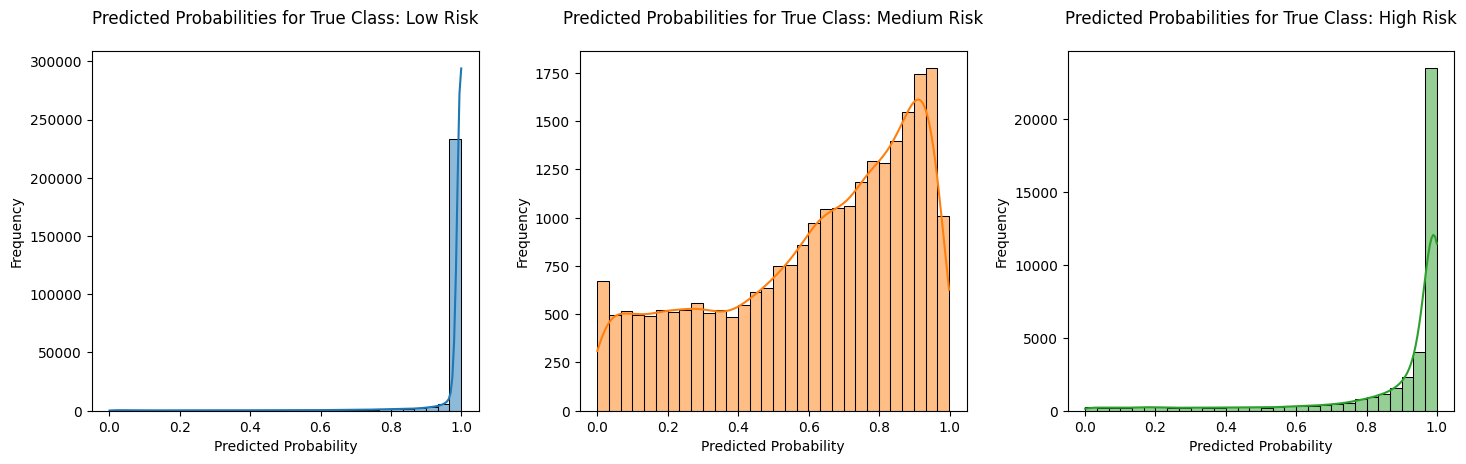

In [56]:
import numpy as np
# Get predicted probabilities
y_pred_prob = model.predict(X_test)
plt.figure(figsize=(15, 5))  # Made wider and taller
for i, cls in enumerate(['Low Risk', 'Medium Risk', 'High Risk']):
    plt.subplot(1, 3, i+1)
    sns.histplot(y_pred_prob[y_test == i, i], bins=30, kde=True, color='C'+str(i))
    plt.title(f'Predicted Probabilities for True Class: {cls}', pad=20)  # Added padding
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
plt.tight_layout(pad=2.0)  # Added extra padding
plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# True and predicted labels (from your test set)
y_true = y_test
y_pred_labels = y_pred

# Medium Risk class label = 1
medium_idx = np.where(y_true == 1)[0]

# Find misclassified Medium Risk samples (false negatives + false positives in Medium)
misclassified_medium_idx = [i for i in medium_idx if y_pred_labels[i] != 1]

print(f"Total Medium Risk samples: {len(medium_idx)}")
print(f"Misclassified Medium Risk samples: {len(misclassified_medium_idx)}")


Total Medium Risk samples: 25807
Misclassified Medium Risk samples: 7702


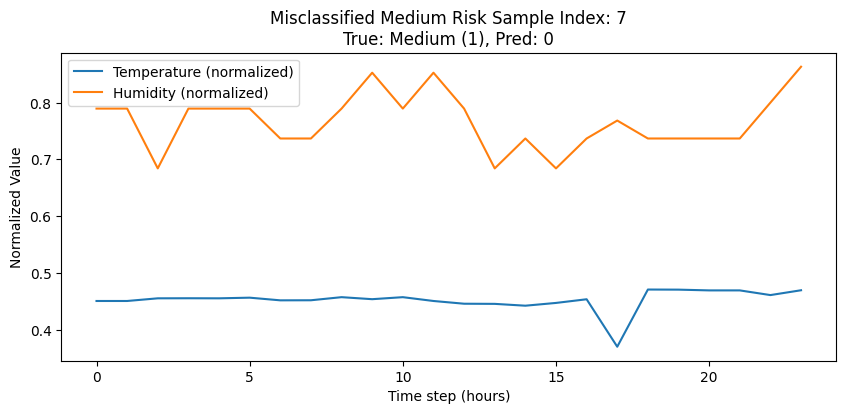

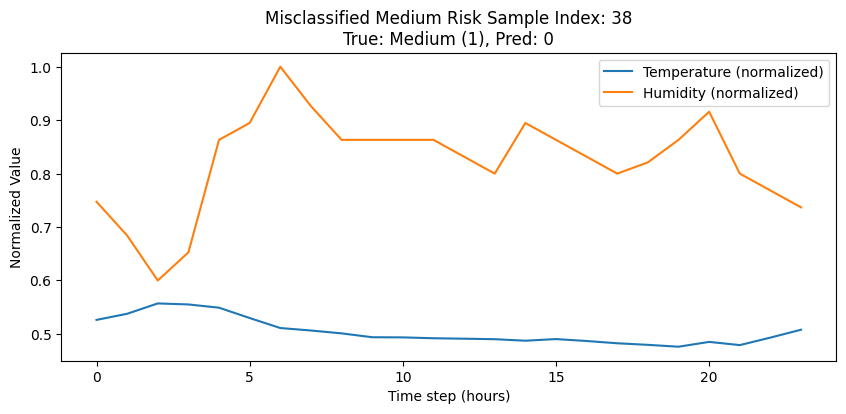

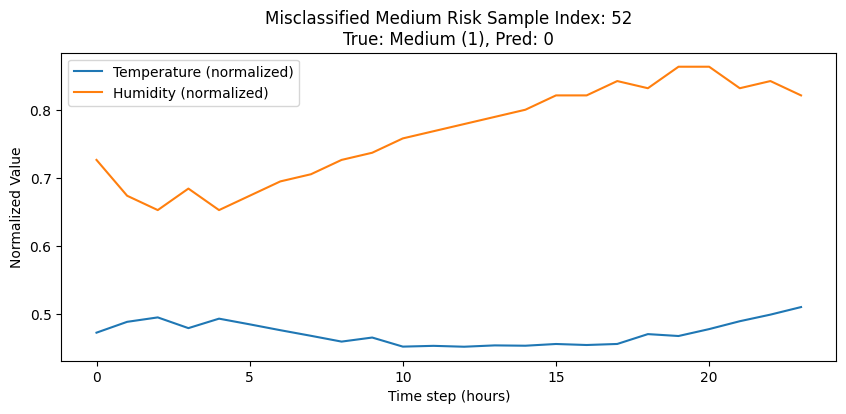

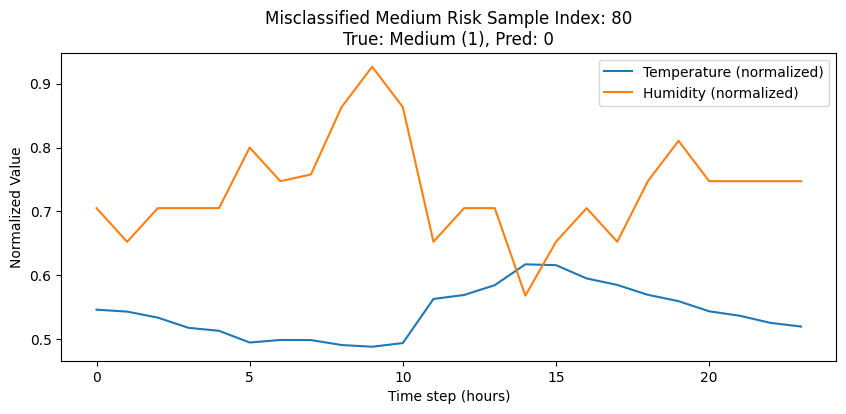

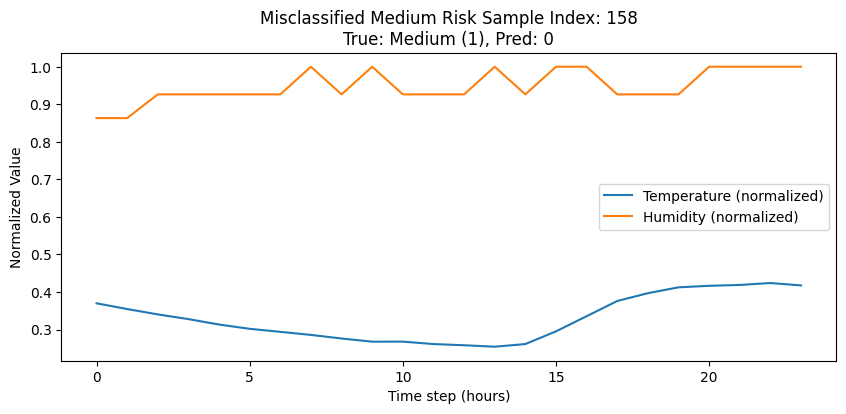

In [47]:
# Index of features in your dataset
temp_idx = features.index('temperature')
humid_idx = features.index('humidity')

# Pick a few misclassified Medium Risk samples randomly
sample_indices = misclassified_medium_idx[:5]

for idx in sample_indices:
    seq = X_test[idx]  # shape (24, feature_dim)
    true_label = y_true[idx]
    pred_label = y_pred_labels[idx]

    plt.figure(figsize=(10,4))
    plt.plot(seq[:, temp_idx], label='Temperature (normalized)')
    plt.plot(seq[:, humid_idx], label='Humidity (normalized)')
    plt.title(f'Misclassified Medium Risk Sample Index: {idx}\nTrue: Medium (1), Pred: {pred_label}')
    plt.xlabel('Time step (hours)')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()


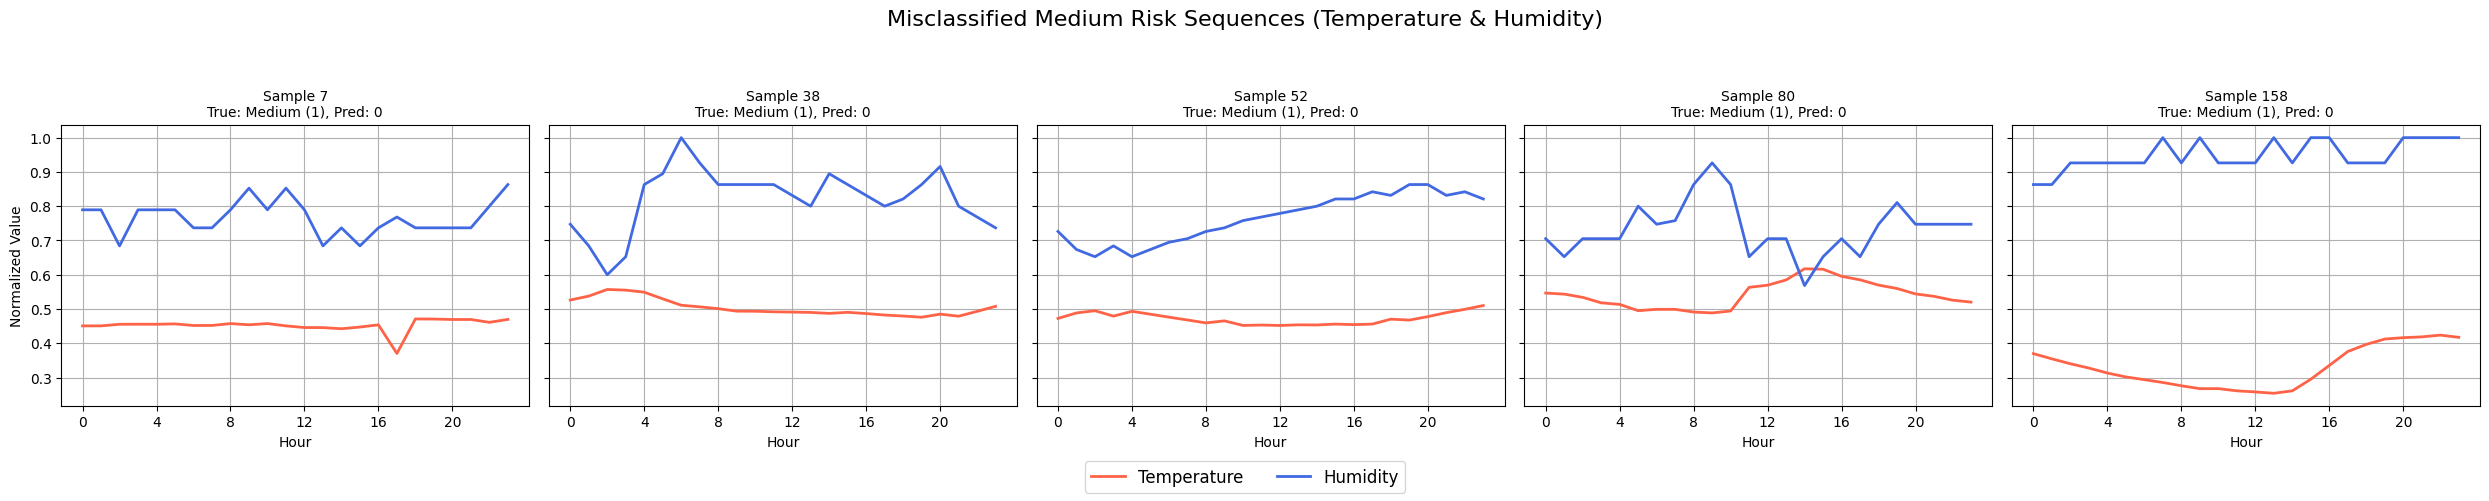

In [49]:
import matplotlib.pyplot as plt

# Feature indexes
temp_idx = features.index('temperature')
humid_idx = features.index('humidity')

# Pick 5 misclassified Medium Risk sample indices
sample_indices = misclassified_medium_idx[:5]

# Create subplots: 1 row, 5 columns (larger size)
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, idx in enumerate(sample_indices):
    seq = X_test[idx]  # shape: (24, feature_dim)
    true_label = y_true[idx]
    pred_label = y_pred_labels[idx]

    ax = axes[i]
    ax.plot(seq[:, temp_idx], label='Temperature', color='tomato', linewidth=2)
    ax.plot(seq[:, humid_idx], label='Humidity', color='royalblue', linewidth=2)
    ax.set_title(f"Sample {idx}\nTrue: Medium (1), Pred: {pred_label}", fontsize=10)
    ax.set_xlabel("Hour")
    ax.set_xticks(range(0, 24, 4))  # Tick every 4 hours
    ax.grid(True)
    if i == 0:
        ax.set_ylabel("Normalized Value")

# Common legend placed below all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=12)

# Add overall title
plt.suptitle("Misclassified Medium Risk Sequences (Temperature & Humidity)", fontsize=16)

# Adjust spacing
plt.tight_layout(rect=[0, 0.07, 1, 0.92])  # Leave space for title and legend

# Show the figure
plt.show()


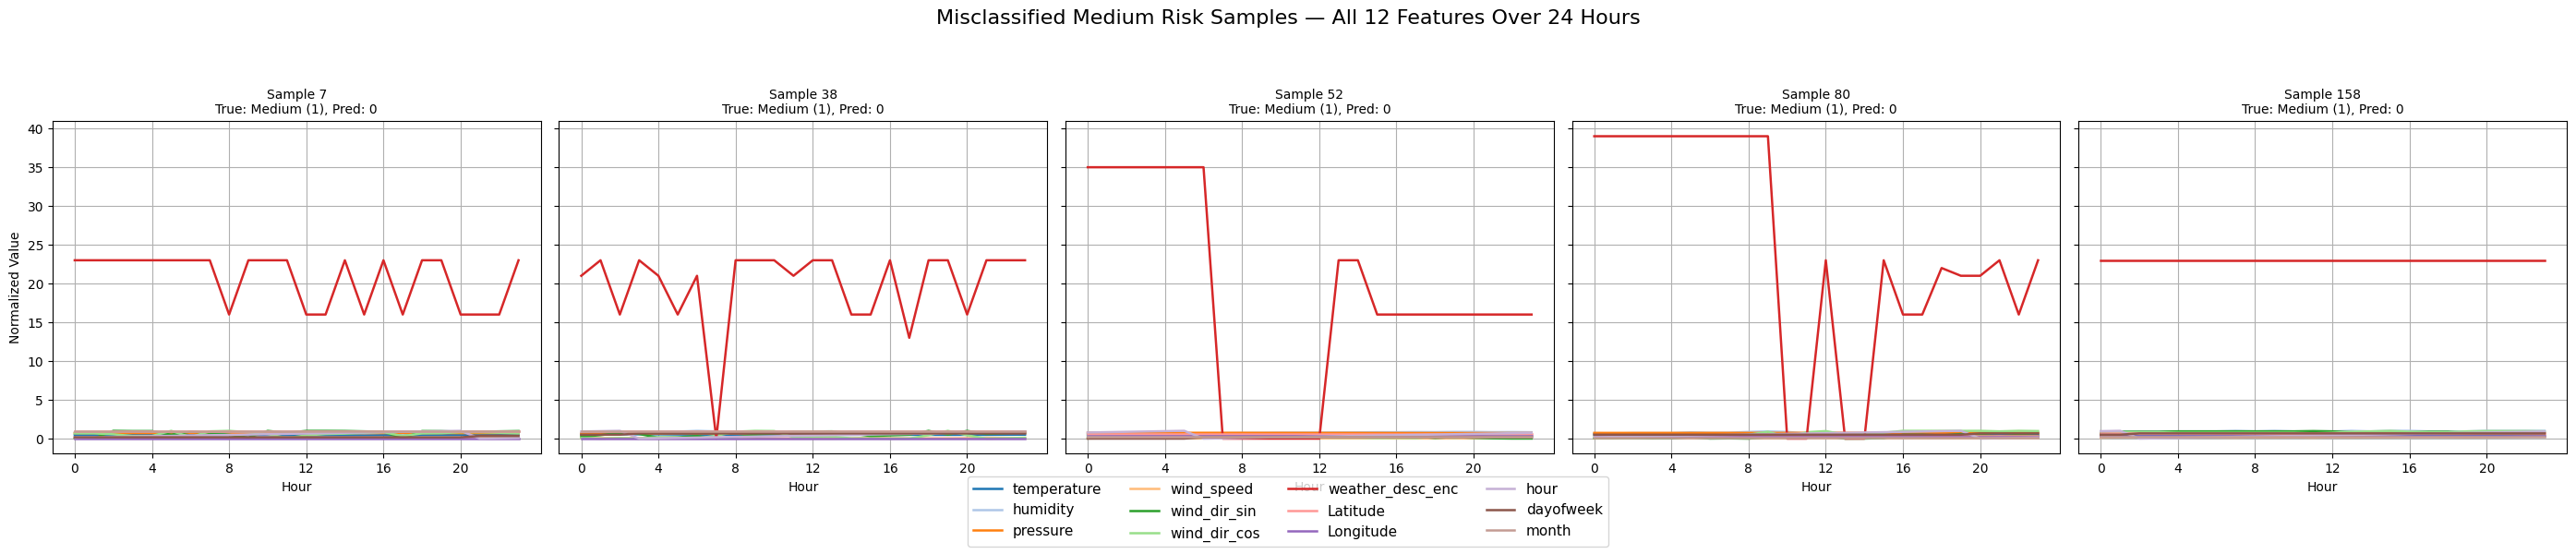

In [50]:
import matplotlib.pyplot as plt

# Your original feature list
features = ['temperature', 'humidity', 'pressure', 'wind_speed',
            'wind_dir_sin', 'wind_dir_cos', 'weather_desc_enc',
            'Latitude', 'Longitude', 'hour', 'dayofweek', 'month']

# Select first 5 misclassified Medium Risk samples
sample_indices = misclassified_medium_idx[:5]

# Prepare colors for features
colors = plt.cm.tab20.colors  # up to 20 distinct colors

# Subplot setup: 5 wide plots for 5 samples
fig, axes = plt.subplots(1, 5, figsize=(28, 6), sharey=True)

for i, idx in enumerate(sample_indices):
    seq = X_test[idx]  # shape: (24, 12)
    ax = axes[i]
    
    for j, feature_name in enumerate(features):
        ax.plot(seq[:, j], label=feature_name, color=colors[j % len(colors)], linewidth=1.8)

    ax.set_title(f"Sample {idx}\nTrue: Medium (1), Pred: {y_pred_labels[idx]}", fontsize=10)
    ax.set_xlabel("Hour")
    ax.set_xticks(range(0, 24, 4))
    ax.grid(True)
    if i == 0:
        ax.set_ylabel("Normalized Value")

# Shared legend below all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=11)

# Main title
plt.suptitle("Misclassified Medium Risk Samples — All 12 Features Over 24 Hours", fontsize=16)

# Adjust spacing to fit everything
plt.tight_layout(rect=[0, 0.08, 1, 0.92])
plt.show()


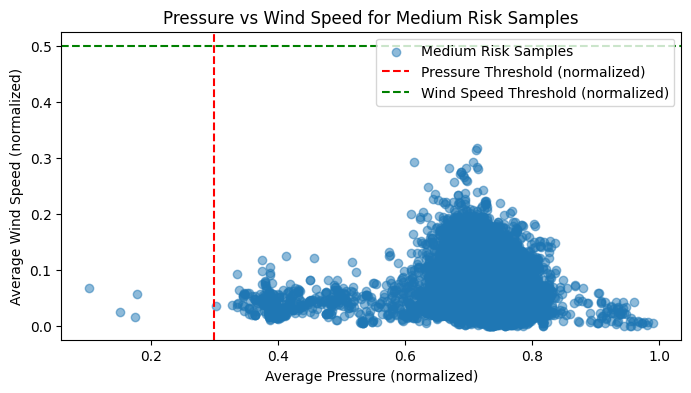

In [51]:
press_idx = features.index('pressure')
wind_idx = features.index('wind_speed')

# Extract pressure and wind values for all Medium Risk samples
pressure_vals = X_test[medium_idx, :, press_idx].mean(axis=1)  # average over 24 hours
wind_vals = X_test[medium_idx, :, wind_idx].mean(axis=1)

plt.figure(figsize=(8,4))
plt.scatter(pressure_vals, wind_vals, alpha=0.5, label='Medium Risk Samples')
plt.axvline(x= (980 - 950)/100, color='r', linestyle='--', label='Pressure Threshold (normalized)')
plt.axhline(y= 20/40, color='g', linestyle='--', label='Wind Speed Threshold (normalized)')
plt.xlabel('Average Pressure (normalized)')
plt.ylabel('Average Wind Speed (normalized)')
plt.title('Pressure vs Wind Speed for Medium Risk Samples')
plt.legend()
plt.show()


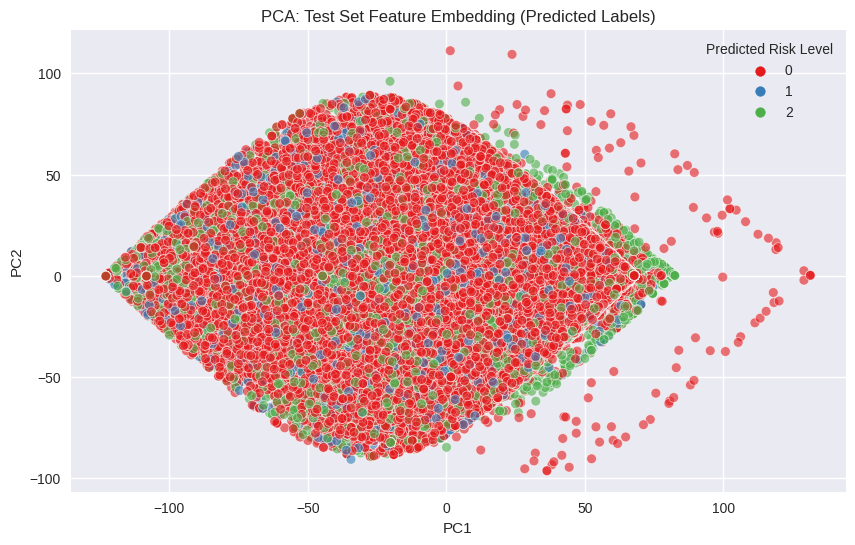

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten sequences
X_flat = X_test.reshape(X_test.shape[0], -1)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette='Set1', alpha=0.6)
plt.title("PCA: Test Set Feature Embedding (Predicted Labels)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Predicted Risk Level")
plt.grid(True)
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_flat)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_pred, palette='Set2', alpha=0.6)
plt.title("t-SNE: Test Set Feature Embedding (Predicted Labels)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Predicted Risk Level")
plt.grid(True)
plt.show()


<Figure size 600x600 with 0 Axes>

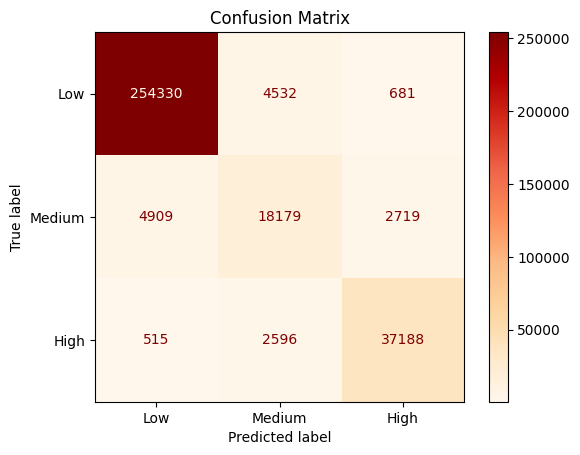

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(6,6))
disp.plot(cmap='OrRd', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


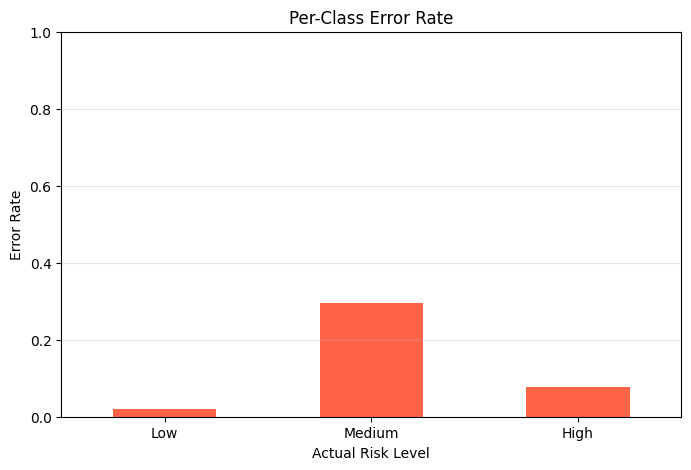

In [7]:
error_mask = y_test != y_pred
correct_mask = y_test == y_pred

error_df = pd.DataFrame({
    'True': y_test,
    'Predicted': y_pred,
    'Correct': correct_mask
})

error_rate = error_df.groupby('True')['Correct'].apply(lambda x: 1 - x.mean())

plt.figure(figsize=(8,5))
error_rate.plot(kind='bar', color='tomato')
plt.title("Per-Class Error Rate")
plt.xlabel("Actual Risk Level")
plt.ylabel("Error Rate")
plt.xticks(ticks=[0,1,2], labels=['Low', 'Medium', 'High'], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)
plt.show()


/tmp/ipykernel_35/1526363077.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weather_accuracy = df_test.groupby('weather_desc').apply(


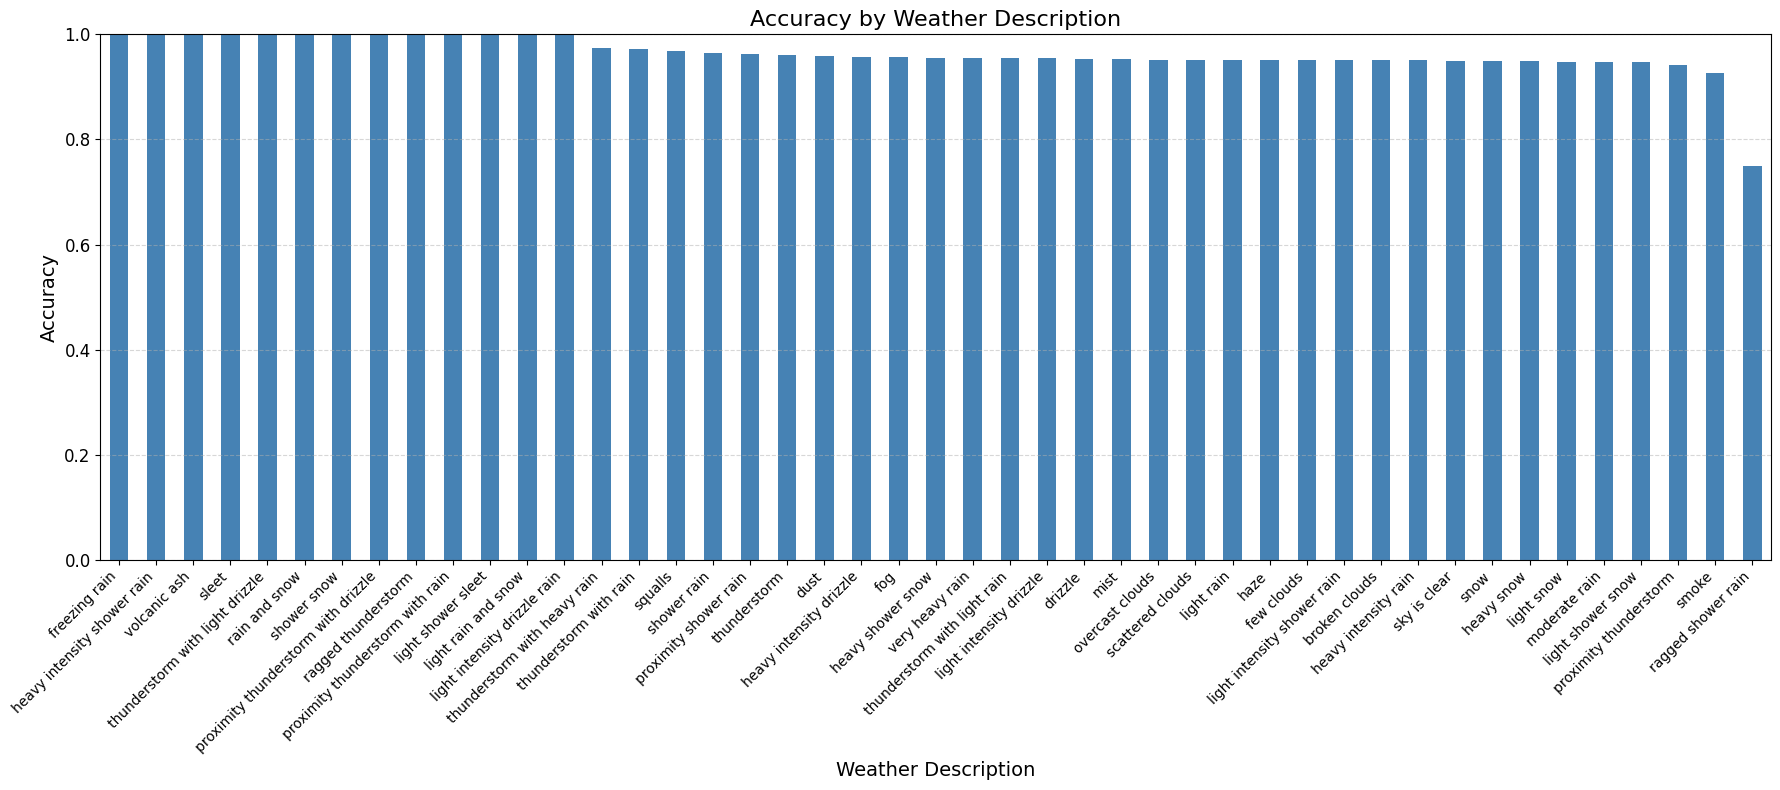

In [11]:
import matplotlib.pyplot as plt

# Map predictions back to df
test_indices = df.index[df['city'].isin(df['city'].unique())][-len(y_test):]
df_test = df.loc[test_indices].copy()
df_test['y_true'] = y_test
df_test['y_pred'] = y_pred

# Group by weather description and calculate accuracy
weather_accuracy = df_test.groupby('weather_desc').apply(
    lambda x: (x['y_true'] == x['y_pred']).mean()
).sort_values(ascending=False)

# Plot with improvements
plt.figure(figsize=(18, 8))  # Bigger figure for clarity
weather_accuracy.plot(kind='bar', color='steelblue')

# Improve plot readability
plt.title("Accuracy by Weather Description", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Weather Description", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(0, 1)

plt.show()


In [ ]:
!pip install shap --quiet

import shap
import random
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Select a sample from validation or test for SHAP (reduce size for speed)
background = X_test[np.random.choice(X_test.shape[0], 100, replace=False)]
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_test[:200])

# Visualize SHAP for class 0 (Low Risk) – can be changed to 1 or 2
shap.summary_plot(shap_values[0], X_test[:200], feature_names=features, plot_type="bar")


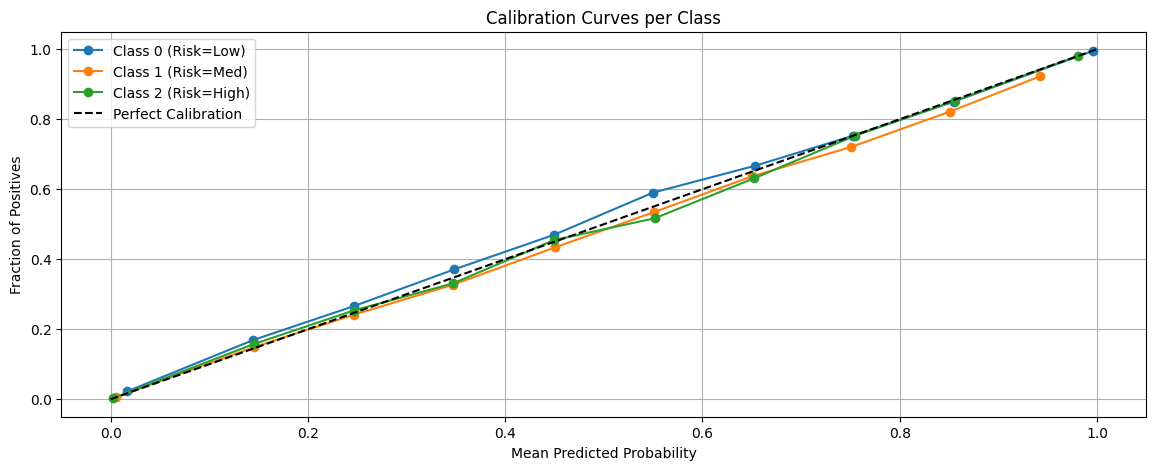

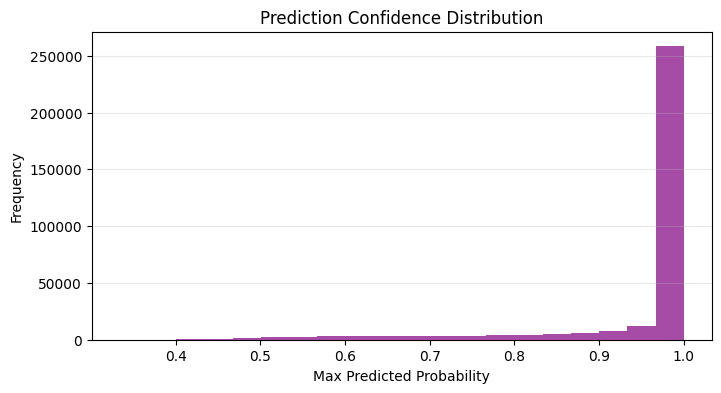

In [9]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import log_loss
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = 3

plt.figure(figsize=(14,5))

for i in range(n_classes):
    prob_true, prob_pred = calibration_curve(y_test_bin[:, i], y_pred_prob[:, i], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f"Class {i} (Risk={['Low','Med','High'][i]})")

plt.plot([0,1],[0,1], 'k--', label='Perfect Calibration')
plt.title('Calibration Curves per Class')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)
plt.show()

# Confidence histogram
confidences = np.max(y_pred_prob, axis=1)
plt.figure(figsize=(8,4))
plt.hist(confidences, bins=20, color='purple', alpha=0.7)
plt.title("Prediction Confidence Distribution")
plt.xlabel("Max Predicted Probability")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


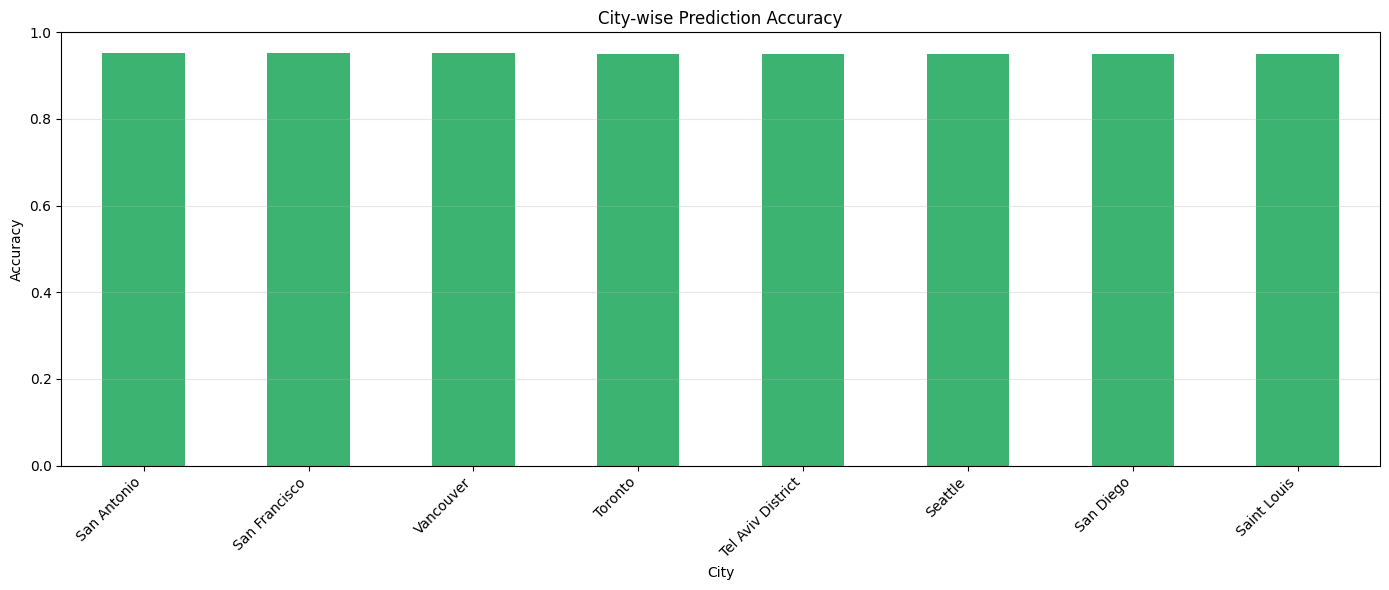

⚠️ Potentially biased predictions in cities:
city
San Antonio          0.952357
San Francisco        0.951871
Vancouver            0.951362
Toronto              0.951053
Tel Aviv District    0.950523
Seattle              0.950191
Name: correct, dtype: float64


In [10]:
# Append predictions to original city-wise test dataframe
df_test['correct'] = df_test['y_true'] == df_test['y_pred']

city_accuracy = df_test.groupby('city')['correct'].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
city_accuracy.plot(kind='bar', color='mediumseagreen')
plt.title("City-wise Prediction Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("City")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Optionally flag biased cities (too low or too high accuracy)
biased_cities = city_accuracy[(city_accuracy < 0.6) | (city_accuracy > 0.95)]
print("⚠️ Potentially biased predictions in cities:")
print(biased_cities)


In [16]:
!pip install lime --quiet

import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler

# Flatten each 2D sequence (24 timesteps × 12 features = 288 features)
X_flat = X_test.reshape((X_test.shape[0], -1))

# Scale for LIME (recommended)
scaler_lime = StandardScaler()
X_flat_scaled = scaler_lime.fit_transform(X_flat)

# Define a prediction wrapper
def predict_fn(input_flat):
    input_seq = input_flat.reshape((-1, sequence_length, len(features)))
    return model.predict(input_seq)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_flat_scaled,
    feature_names=[f"{feat}_t{i}" for i in range(sequence_length) for feat in features],
    class_names=['Low Risk', 'Medium Risk', 'High Risk'],
    mode='classification',
    discretize_continuous=True
)

# Pick a test instance to explain
idx = 5  # change to any index of interest
exp = explainer.explain_instance(X_flat_scaled[idx], predict_fn, num_features=10, top_labels=3)

# Show explanation for predicted class
exp.show_in_notebook(show_table=True, show_all=False)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [23]:
# Print prediction probabilities
probs = predict_fn(X_flat_scaled[idx].reshape(1, -1))
print(f"Prediction probabilities for sample {idx}:")
for class_name, prob in zip(['Low Risk', 'Medium Risk', 'High Risk'], probs[0]):
    print(f"{class_name}: {prob:.4f}")

# Prottek class er jonno alada alada explanation generate & dekhano
for i, class_name in enumerate(['Low Risk', 'Medium Risk', 'High Risk']):
    print(f"\nLIME explanation for class: {class_name}")
    exp_class = explainer.explain_instance(
        X_flat_scaled[idx], 
        predict_fn, 
        num_features=10, 
        labels=[i]  # sudhu oi class er explanation generate
    )
    exp_class.show_in_notebook(labels=[i], show_table=True, show_all=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction probabilities for sample 5:
Low Risk: 0.0013
Medium Risk: 0.0055
High Risk: 0.9932

LIME explanation for class: Low Risk
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step



LIME explanation for class: Medium Risk
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step



LIME explanation for class: High Risk
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 40440 | True: 0 | Predicted: 0 (Low Risk)


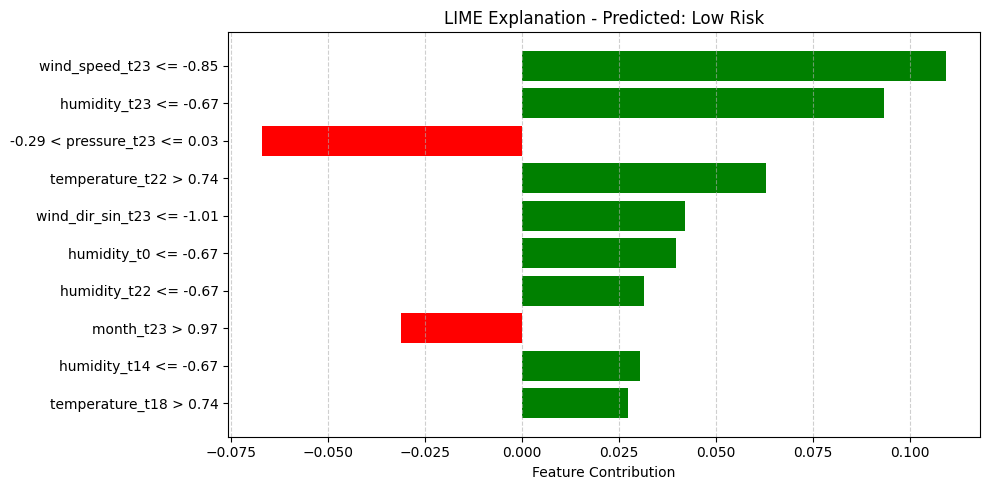

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 246894 | True: 0 | Predicted: 1 (Medium Risk)


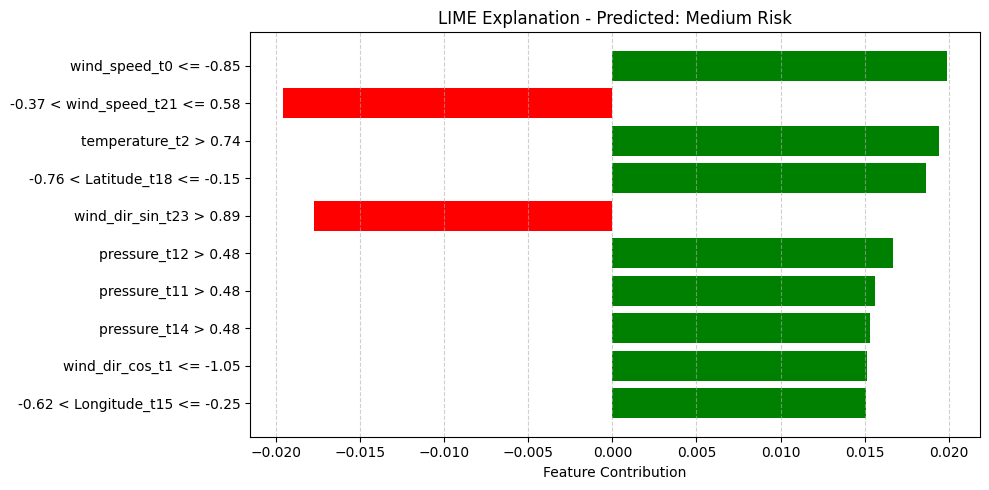

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 97838 | True: 0 | Predicted: 2 (High Risk)


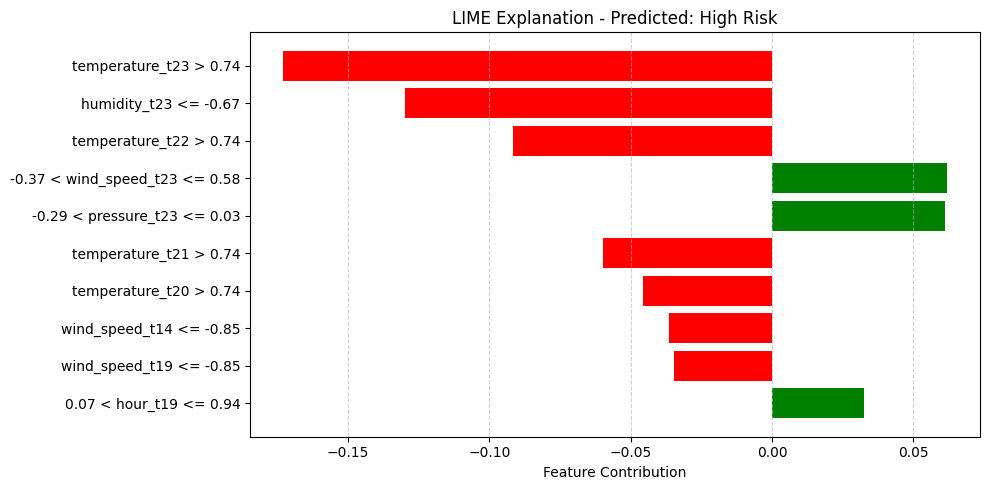

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 90446 | True: 1 | Predicted: 2 (High Risk)


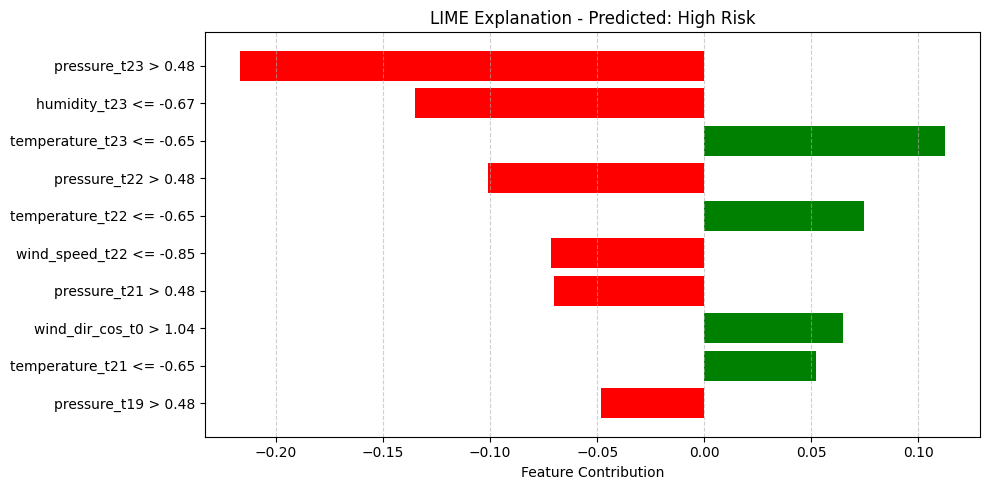

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 32471 | True: 1 | Predicted: 2 (High Risk)


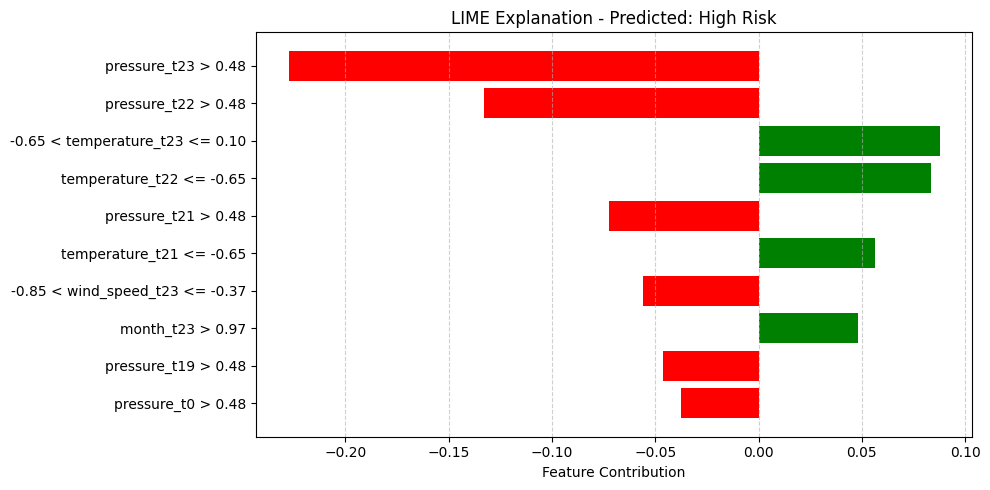

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔍 Sample Index: 128913 | True: 1 | Predicted: 2 (High Risk)


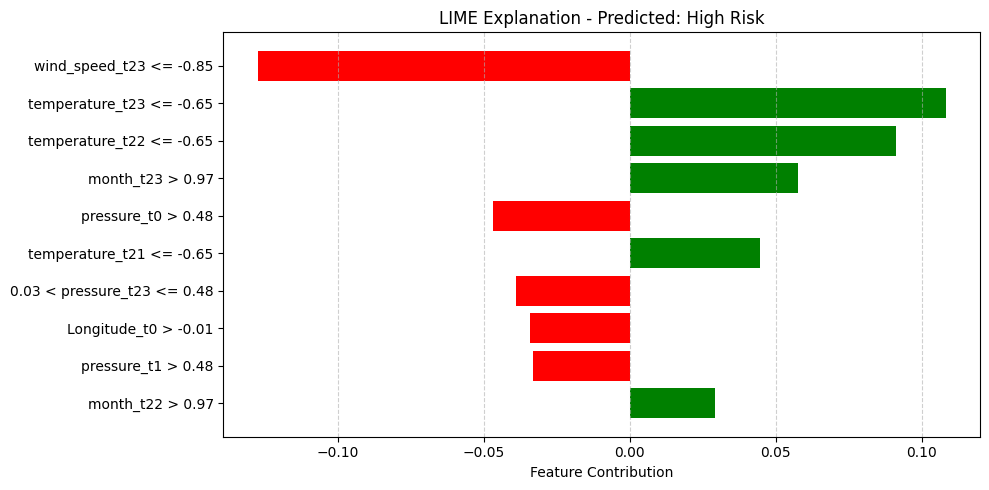

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔍 Sample Index: 34231 | True: 2 | Predicted: 2 (High Risk)


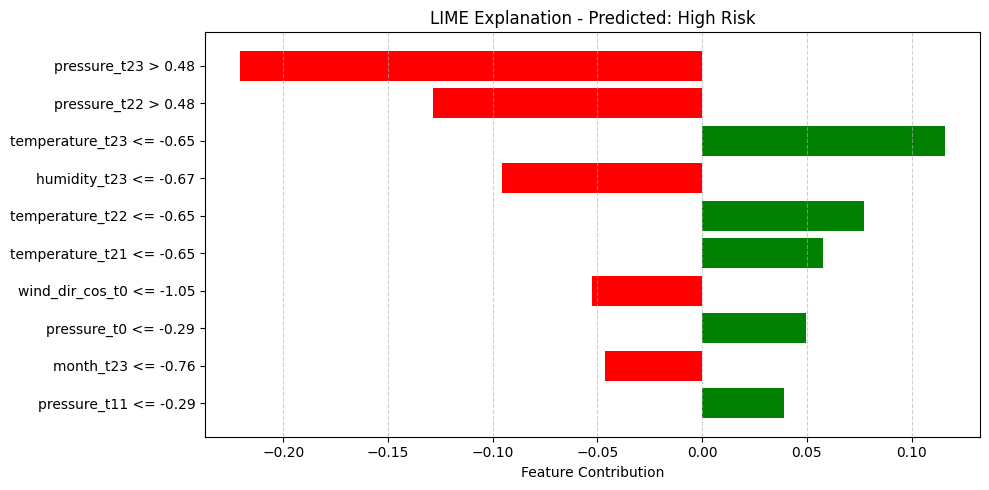

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

🔍 Sample Index: 145761 | True: 2 | Predicted: 2 (High Risk)


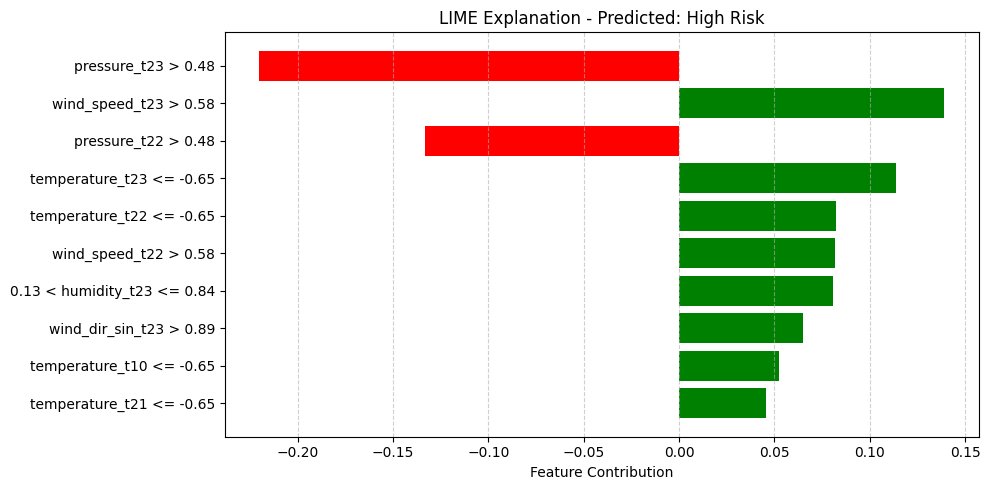

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔍 Sample Index: 147935 | True: 2 | Predicted: 2 (High Risk)


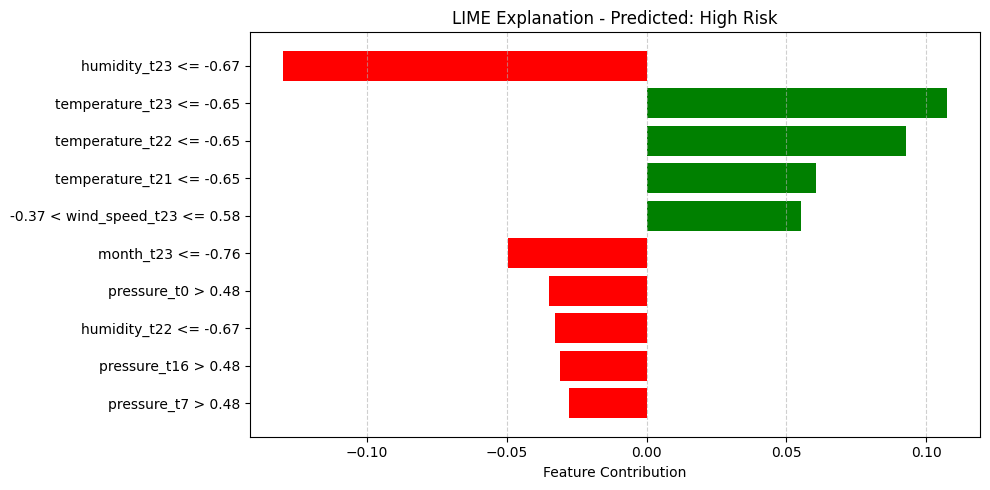

In [18]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import random

# -------------------------
# FLATTEN & SCALE
# -------------------------
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
X_flat = X_test_np.reshape((X_test_np.shape[0], -1))

scaler_lime = StandardScaler()
X_flat_scaled = scaler_lime.fit_transform(X_flat)

# -------------------------
# DEFINE PREDICTION WRAPPER
# -------------------------
def predict_fn(input_flat):
    input_seq = input_flat.reshape((-1, X_test_np.shape[1], X_test_np.shape[2]))
    return model.predict(input_seq)

# -------------------------
# LIME EXPLAINER
# -------------------------
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_flat_scaled,
    feature_names=[f"{feat}_t{i}" for i in range(X_test_np.shape[1]) for feat in features],
    class_names=['Low Risk', 'Medium Risk', 'High Risk'],
    mode='classification',
    discretize_continuous=True
)

# -------------------------
# SELECT 3 SAMPLES PER CLASS
# -------------------------
sample_indices = []
for cls in [0, 1, 2]:
    class_indices = np.where(y_test_np == cls)[0]
    chosen = np.random.choice(class_indices, 3, replace=False)
    sample_indices.extend(chosen)

# -------------------------
# GENERATE AND DISPLAY EXPLANATIONS
# -------------------------
for idx in sample_indices:
    flat_input = X_flat_scaled[idx]
    pred_probs = predict_fn(flat_input.reshape(1, -1))
    predicted_class = np.argmax(pred_probs)

    exp = explainer.explain_instance(flat_input, predict_fn, num_features=10, top_labels=3)
    explanation = exp.as_list(label=predicted_class)
    
    # Plotting
    print(f"\n🔍 Sample Index: {idx} | True: {y_test_np[idx]} | Predicted: {predicted_class} ({exp.class_names[predicted_class]})")
    feature_names, weights = zip(*explanation)
    colors = ['green' if w > 0 else 'red' for w in weights]

    plt.figure(figsize=(10, 5))
    plt.barh(feature_names, weights, color=colors)
    plt.xlabel("Feature Contribution")
    plt.title(f"LIME Explanation - Predicted: {exp.class_names[predicted_class]}")
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


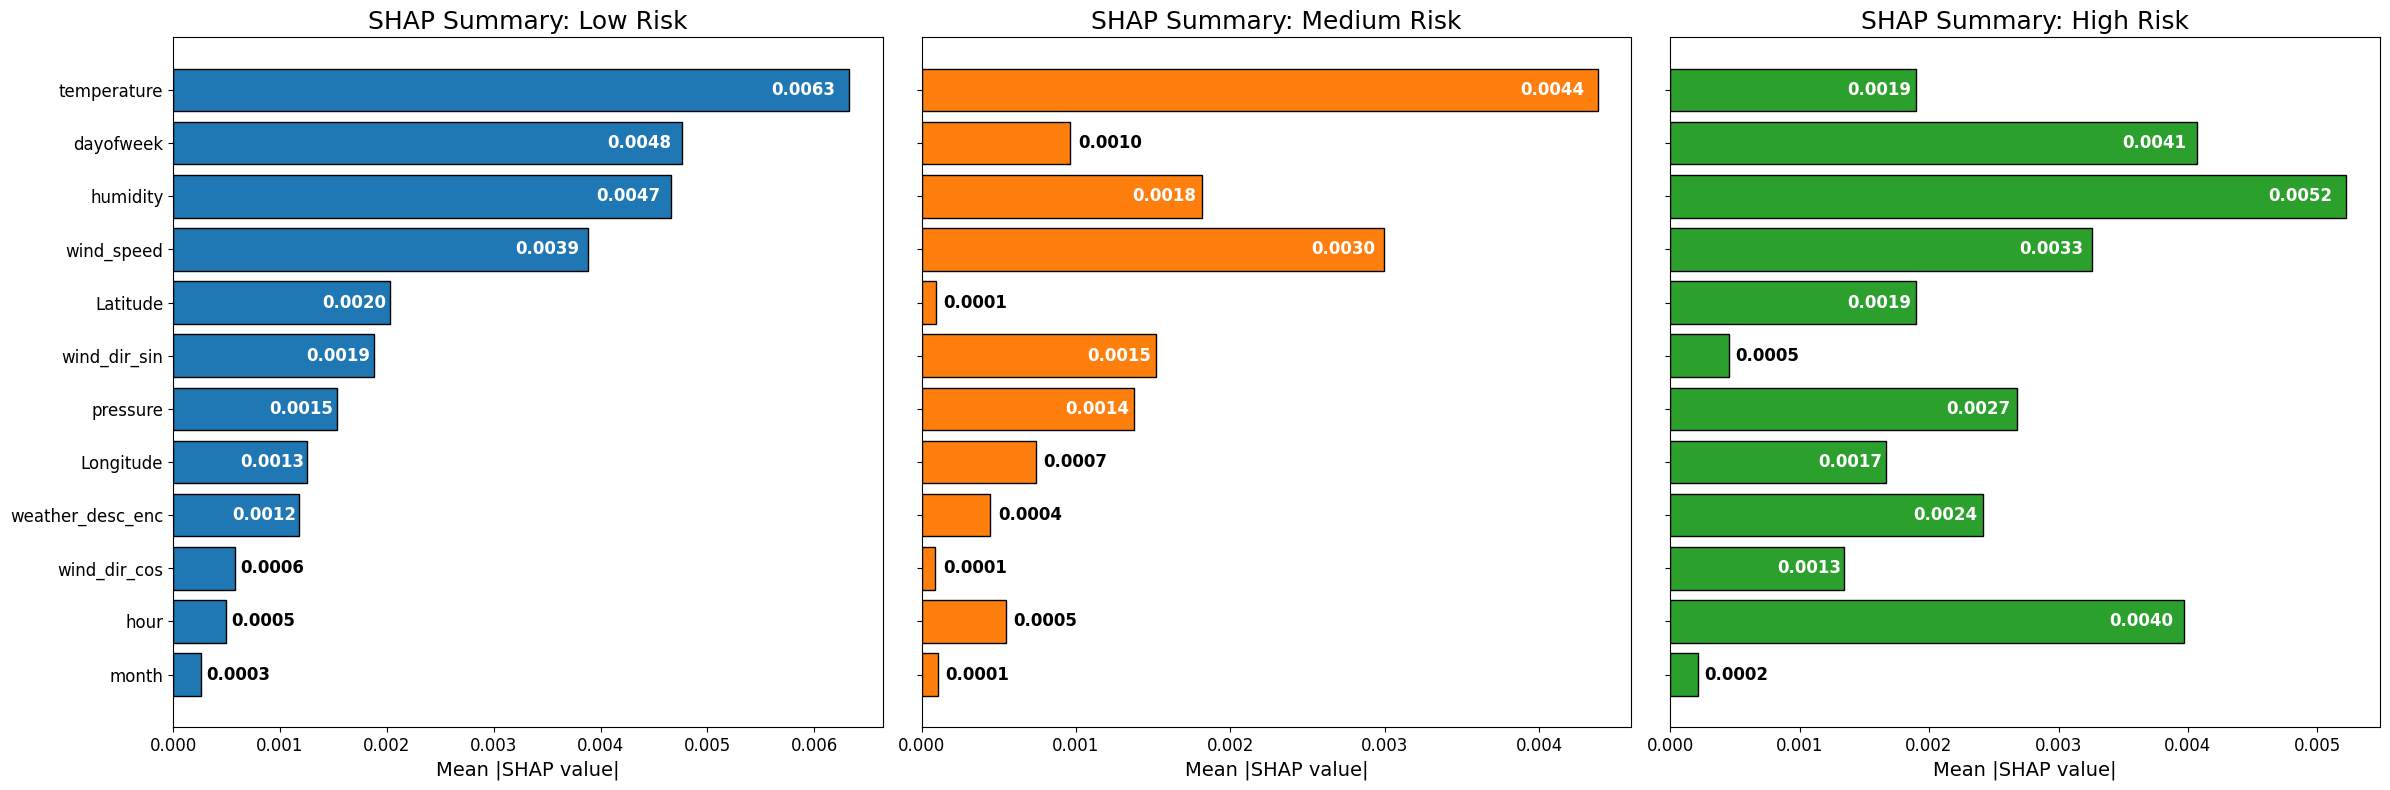

✅ Saved: shap_kernel_summary_polished.png


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

class_names = ['Low Risk', 'Medium Risk', 'High Risk']

for i, ax in enumerate(axes):
    # Sort
    sorted_idx = np.argsort(feature_importances[i])
    sorted_feat = np.array(features)[sorted_idx]
    sorted_imp = feature_importances[i][sorted_idx]

    bars = ax.barh(sorted_feat, sorted_imp, color=colors[i], edgecolor='black')

    for bar, val in zip(bars, sorted_imp):
        xpos = bar.get_width()

        # If bar is wide enough, write inside; else write outside
        if xpos > 0.001:
            ax.text(xpos - xpos*0.02,  # slightly left from end
                    bar.get_y() + bar.get_height()/2,
                    f"{val:.4f}",
                    va='center', ha='right',
                    fontsize=12, fontweight='bold', color='white')
        else:
            ax.text(xpos + 0.00005,  # just right outside
                    bar.get_y() + bar.get_height()/2,
                    f"{val:.4f}",
                    va='center', ha='left',
                    fontsize=12, fontweight='bold', color='black')

    ax.set_title(f"SHAP Summary: {class_names[i]}", fontsize=18)
    ax.set_xlabel("Mean |SHAP value|", fontsize=14)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.savefig("shap_kernel_summary_polished.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: shap_kernel_summary_polished.png")
